In [1]:
TRAIN_CSV_PATH = r"../datasets/train.csv"
PRICES_CSV_PATH = r"../datasets/prices.csv"
CAL_CSV_PATH = r"../datasets/calendar.csv"

In [35]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot

from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_prices = pd.read_csv(PRICES_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [4]:
def plot_lags(time_series):
    """
    Plots lag 1 to 30 for a time series.
    
    Parameters:
    time_series (pandas.Series): A pandas series containing the time series data.
    
    Returns:
    None
    """
    
    # Create a new figure and set the size
    fig = plt.figure(figsize=(16, 16))
    
    # Loop through lags 1 to 30
    for i in range(1, 31):
        # Create a subplot with a specific position
        ax = fig.add_subplot(6, 5, i)
        # Plot the lagged data
        lag_plot(time_series, lag=i)
        # Set the title of the subplot
        ax.set_title(f"Lag {i}")
        
    # Adjust the spacing between the subplots
    fig.tight_layout()
    
    # Show the plot
    plt.show()

In [5]:
def plot_rolling_average(time_series):
    """
    Plots rolling average for 7, 14, 30 and 60 days for a time series.
    
    Parameters:
    time_series (pandas.Series): A pandas series containing the time series data.
    
    Returns:
    None
    """
    
    # Define the window sizes for the rolling averages
    window_sizes = [7, 14, 30, 60]
    
    # Create a new figure and set the size
    fig = plt.figure(figsize=(12, 8))
    
    # Loop through the window sizes
    for i, window in enumerate(window_sizes):
        
        # # Calculate the rolling average
        # rolling_avg = time_series.rolling(window=window).mean()
        
        # Create a subplot with a specific position
        ax = fig.add_subplot(2, 2, i+1)
        
        # Plot the rolling average
        # ax.plot(time_series.index, rolling_avg)
        time_series.rolling(window).mean().plot(ax = ax)

        # Set the title of the subplot
        ax.set_title(f"Rolling Average ({window} days)")
        
    # Adjust the spacing between the subplots
    fig.tight_layout()
    
    # Show the plot
    plt.show()


In [6]:
def plot_seasonal(x, labels, hue, df, num_rows, num_cols, width, height):
    """
    Plots seasonal trend of each day / month, with one timeseries per month / year.
    Plots a seasonal trend subplot for each category in labels.

    Parameters:
    x: Time period for x axis (string)
    labels: List of categories to iterate through, e.g. items sold (list)
    hue: Time period for each timeseries 
    df: pandas dataframe
    num_rows: number of rows for subplots
    num_cols: number of cols for subplots
    width: width of graph
    height: height of graph
    
    Returns:
    None
    """

    fig = plt.figure(figsize=(width, height))

    # Loop through the window sizes
    for i, cat in enumerate(labels):
        
        # Create a subplot with a specific position
        ax = fig.add_subplot(num_rows, num_cols, i+1)
        ax.tick_params(axis='x', rotation=90)

        # Plot the timeseries
        sns.lineplot(x = x, y = cat, data = df, hue = hue, ax = ax, errorbar = None)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

        # Set the title of the subplot
        ax.set_title(f"Seasonal trend for {cat}")
        
    # Adjust the spacing between the subplots
    fig.tight_layout()
    
    # Show the plot
    plt.show()


In [7]:
def plot_autocorrelation(labels, df, num_rows, num_cols, width, height):
    """
    Plots autocorrelation graph for each category as subplots.

    Parameters:
    labels: List of categories to iterate through, e.g. region list (list)
    df: pandas dataframe
    num_rows: number of rows for subplots
    num_cols: number of cols for subplots
    width: width of graph
    height: height of graph
    
    Returns:
    None
    """

    fig = plt.figure(figsize=(width, height))

    # Loop through the window sizes
    for i, cat in enumerate(labels):
        
        # Create a subplot with a specific position
        ax = fig.add_subplot(num_rows, num_cols, i+1)

        # Plot the timeseries
        autocorrelation_plot(df[cat], ax = ax)

        # Set the title of the subplot
        ax.set_title(f"Autocorrelation plot for {cat}")
        
    # Adjust the spacing between the subplots
    fig.tight_layout()
    
    # Show the plot
    plt.show()


### Metadata for train csv

id - an id identifying the smallest data granularity for which the forecast will be assessed: by product and by store

item_id - the id of the item

subcat_id - the id of the subcategory the item belongs to

category_id - the id of the category the item belongs to

store_id - the id of the store the product is sold at

region_id - the id of the region the store is located in

wm_yr_wk - week encoding

In [8]:
df_train.head()

id       item_id subcat_id category_id store_id region_id  \
0  Beauty_1_001_East_1  Beauty_1_001  Beauty_1      Beauty   East_1      East   
1  Beauty_1_002_East_1  Beauty_1_002  Beauty_1      Beauty   East_1      East   
2  Beauty_1_003_East_1  Beauty_1_003  Beauty_1      Beauty   East_1      East   
3  Beauty_1_004_East_1  Beauty_1_004  Beauty_1      Beauty   East_1      East   
4  Beauty_1_005_East_1  Beauty_1_005  Beauty_1      Beauty   East_1      East   

   d_1  d_2  d_3  d_4  ...  d_1910  d_1911  d_1912  d_1913  d_1914  d_1915  \
0    0    0    0    0  ...       3       0       1       1       0       0   
1    0    0    0    0  ...       0       0       0       0       0       1   
2    0    0    0    0  ...       0       1       1       1       0       0   
3    0    0    0    0  ...       1       3       7       2       0       0   
4    0    0    0    0  ...       2       2       2       4       1       0   

   d_1916  d_1917  d_1918  d_1919  
0       0       2       0       3  
1       0       0       0       0  
2       1       1       0       2  
3       1       2       4       1  
4       2       3       1       0  

[5 rows x 1925 columns]

In [9]:
df_prices.head()

store_id       item_id  wm_yr_wk  sell_price
0   East_1  Beauty_1_001     11325        9.58
1   East_1  Beauty_1_001     11326        9.58
2   East_1  Beauty_1_001     11327        8.26
3   East_1  Beauty_1_001     11328        8.26
4   East_1  Beauty_1_001     11329        8.26

In [10]:
df_prices["store_id"] = df_prices["store_id"].astype("string")
df_prices["item_id"] = df_prices["item_id"].astype("string")
df_prices["wm_yr_wk"] = df_prices["wm_yr_wk"].astype(int)
df_prices["sell_price"] = df_prices["sell_price"].astype(float)

In [11]:
df_cal.head()

date  wm_yr_wk    weekday  wday  month  year    d
0  2011-01-29     11101   Saturday     1      1  2011  d_1
1  2011-01-30     11101     Sunday     2      1  2011  d_2
2  2011-01-31     11101     Monday     3      1  2011  d_3
3  2011-02-01     11101    Tuesday     4      2  2011  d_4
4  2011-02-02     11101  Wednesday     5      2  2011  d_5

In [12]:
# Change dtypes
df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal["weekday"] = df_cal["weekday"].astype("string")
df_cal["d"] = df_cal["d"].astype("string")
df_cal["wm_yr_wk"] = df_cal["wm_yr_wk"].astype(int)

In [13]:
# Add column with months in string
month_names_ls = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_int_ls = list(range(1, 13))
month_names_dict = {month_int_ls[i]: month_names_ls[i] for i in range(len(month_int_ls))}

df_cal["month_name"] = df_cal["month"].replace(month_names_dict)

In [14]:
# Change to string datatype
df_cal["month_name"] = df_cal["month_name"].astype("string")

### Data cleaning on train.csv

In [15]:
# Check NAs: All filled
df_train.isna().sum().sum()

0

In [16]:
# Convert to appropriate datatypes
df_train["id"] = df_train["id"].astype("string")
df_train["item_id"] = df_train["item_id"].astype("string")
df_train["subcat_id"] = df_train["subcat_id"].astype("string")
df_train["category_id"] = df_train["category_id"].astype("string")
df_train["store_id"] = df_train["store_id"].astype("string")
df_train["region_id"] = df_train["region_id"].astype("string")

### EDA on df_prices, merged with cal to plot timeseries

In [17]:
df_prices_cal = pd.merge(df_prices, df_cal, on = "wm_yr_wk", how = "inner")
df_prices_cal.head()

store_id       item_id  wm_yr_wk  sell_price       date    weekday  wday  \
0   East_1  Beauty_1_001     11325        9.58 2013-07-13   Saturday     1   
1   East_1  Beauty_1_001     11325        9.58 2013-07-14     Sunday     2   
2   East_1  Beauty_1_001     11325        9.58 2013-07-15     Monday     3   
3   East_1  Beauty_1_001     11325        9.58 2013-07-16    Tuesday     4   
4   East_1  Beauty_1_001     11325        9.58 2013-07-17  Wednesday     5   

   month  year      d month_name  
0      7  2013  d_897        Jul  
1      7  2013  d_898        Jul  
2      7  2013  d_899        Jul  
3      7  2013  d_900        Jul  
4      7  2013  d_901        Jul

In [18]:
df_prices_cal.shape

(47735397, 11)

Since wm_yr_wk provides only details up to the specific week instead of day, the sell price would be the same for the same item for same week. So we can remove duplicates from the dataframe: as long item_id, wm_yr_wk, sell_price are the same, we can drop the rows.

In [19]:
df_prices_cal = df_prices_cal.drop_duplicates(["item_id", "wm_yr_wk", "sell_price", "store_id"])
df_prices_cal.shape

(6841121, 11)

In [20]:
df_prices_cal.index = df_prices_cal["date"]

# Create new demographic rows for prices
df_prices_cal["Category"] = df_prices_cal["item_id"].str.split("_", 1, expand = True).iloc[:, 0]
df_prices_cal["Region"] = df_prices_cal["store_id"].str.split("_", 1, expand = True).iloc[:, 0]

In [21]:
df_prices_cal.head()

store_id       item_id  wm_yr_wk  sell_price       date   weekday  \
date                                                                           
2013-07-13   East_1  Beauty_1_001     11325        9.58 2013-07-13  Saturday   
2013-07-13   East_1  Beauty_1_002     11325        3.97 2013-07-13  Saturday   
2013-07-13   East_1  Beauty_1_004     11325        4.64 2013-07-13  Saturday   
2013-07-13   East_1  Beauty_1_005     11325        3.08 2013-07-13  Saturday   
2013-07-13   East_1  Beauty_1_006     11325        1.00 2013-07-13  Saturday   

            wday  month  year      d month_name Category Region  
date                                                             
2013-07-13     1      7  2013  d_897        Jul   Beauty   East  
2013-07-13     1      7  2013  d_897        Jul   Beauty   East  
2013-07-13     1      7  2013  d_897        Jul   Beauty   East  
2013-07-13     1      7  2013  d_897        Jul   Beauty   East  
2013-07-13     1      7  2013  d_897        Jul   Beauty   East

#### Descriptive stats

In [22]:
df_prices_cal.groupby(by = "Region")["sell_price"].describe()

count      mean       std   min   25%   50%   75%     max
Region                                                                
Central  2092122.0  4.376181  3.375513  0.02  2.00  3.42  5.84   52.62
East     2708822.0  4.416770  3.414746  0.01  2.18  3.47  5.77   30.98
West     2040177.0  4.438885  3.434513  0.01  2.18  3.47  5.94  107.32

In [23]:
df_prices_cal.groupby(by = "Category")["sell_price"].describe()

count      mean       std   min   25%   50%   75%     max
Category                                                               
Beauty    1283905.0  5.333896  4.828999  0.01  1.97  3.97  7.47   30.98
Cleaning  2375427.0  5.465780  3.375843  0.01  2.98  4.94  6.97  107.32
Food      3181789.0  3.251027  2.132220  0.01  1.98  2.68  3.98   19.48

In [24]:
df_prices_cal.sort_values(by = ["wday", "month", "year"]).groupby(by = ["month_name", "year"])["sell_price"].describe()

count      mean       std   min   25%   50%   75%    max
month_name year                                                             
Apr        2011   72313.0  4.246382  3.097231  0.08  1.98  3.28  5.68  28.00
           2012   75131.0  4.343223  3.118952  0.05  2.18  3.48  5.84  24.92
           2013   94366.0  4.379752  3.320766  0.05  2.18  3.42  5.84  30.98
           2014  110565.0  4.430970  3.507801  0.07  2.00  3.33  5.84  30.98
           2015  120242.0  4.481990  3.543262  0.20  2.18  3.48  5.88  29.97
...                   ...       ...       ...   ...   ...   ...   ...    ...
Sep        2011   64311.0  4.276785  3.078485  0.05  2.00  3.34  5.72  28.00
           2012  104498.0  4.421271  3.339402  0.07  2.18  3.48  5.88  52.62
           2013  101388.0  4.377193  3.414627  0.01  2.08  3.38  5.78  30.98
           2014  116087.0  4.446928  3.521286  0.05  2.14  3.47  5.88  30.98
           2015  121629.0  4.479394  3.540136  0.10  2.24  3.48  5.88  35.88

[66 rows x 8 columns]

<AxesSubplot:xlabel='date', ylabel='sell_price'>

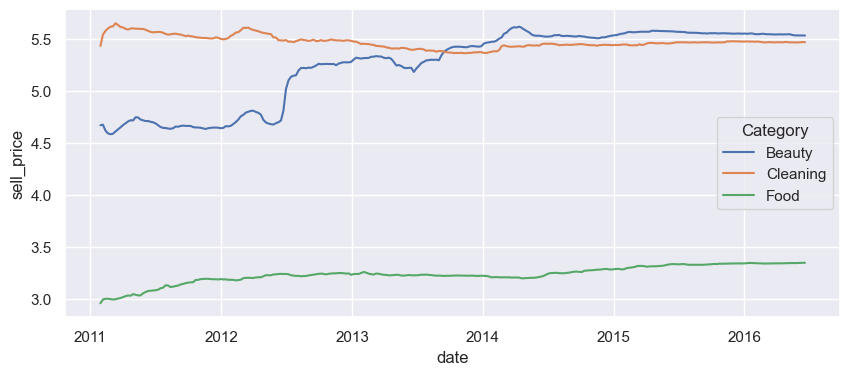

In [25]:
sns.set(rc={'figure.figsize':(10, 4)})

sns.lineplot(x = "date", y = "sell_price", data = df_prices_cal, hue = "Category", errorbar = None)

<AxesSubplot:xlabel='date', ylabel='sell_price'>

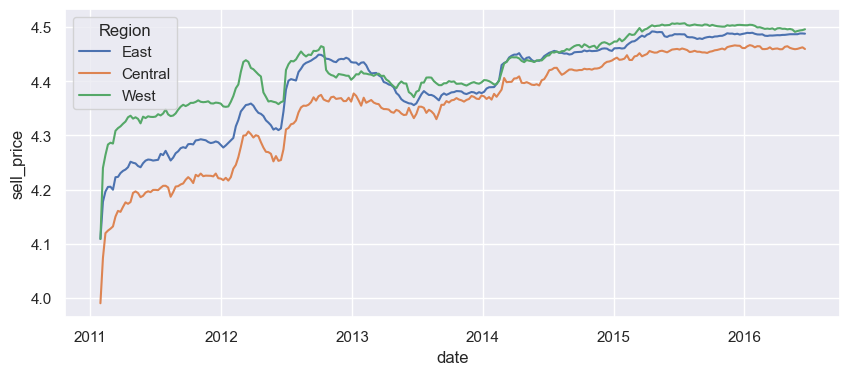

In [26]:
sns.lineplot(x = "date", y = "sell_price", data = df_prices_cal, hue = "Region", errorbar = None)

<AxesSubplot:xlabel='month_name', ylabel='sell_price'>

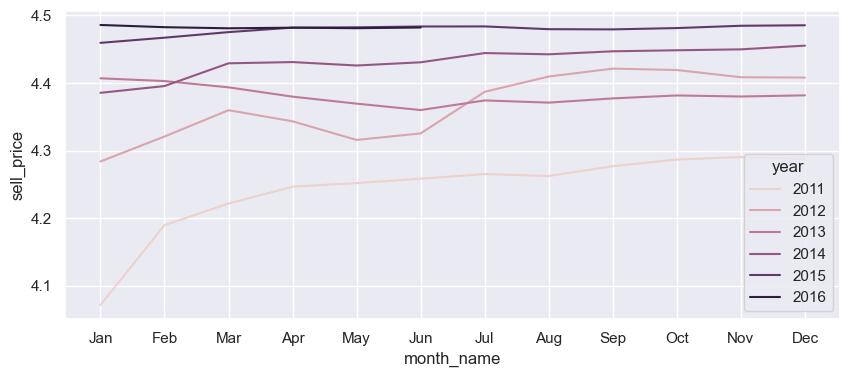

In [27]:
# Seasonal plot, by month and year
sns.set(rc={'figure.figsize':(10, 4)})

sns.lineplot(x = "month_name", y = "sell_price", data = df_prices_cal.sort_values(by = ["wday", "month", "year"]), hue = "year", errorbar=None)

### EDA on train.csv

In [28]:
# Number of unique items for each category
len(df_train["item_id"].unique())

3049

In [29]:
print(df_train["category_id"].unique())
print(df_train["store_id"].unique())
print(df_train["region_id"].unique())

<StringArray>
['Beauty', 'Cleaning', 'Food']
Length: 3, dtype: string
<StringArray>
[   'East_1',    'East_2',    'East_3',    'East_4', 'Central_1', 'Central_2',
 'Central_3',    'West_1',    'West_2',    'West_3']
Length: 10, dtype: string
<StringArray>
['East', 'Central', 'West']
Length: 3, dtype: string


In [30]:
# Save the unique demographic labels for plotting later
category_ls = list(df_train["category_id"].unique())
store_ls = list(df_train["store_id"].unique())
region_ls = list(df_train["region_id"].unique())

In [31]:
# Save day IDs from train
day_ids = list(df_train.columns[6:])

#### Breakdown of items
30490 total records

1919 days of no. of items sold

3049 items

3 categories of items (beauty, cleaning, food)

10 different stores

3 different regions (east, central west)

#### Plots to visualise the number of items sold for each type of cross-sectional data over the 1919 days

In [32]:
df_items_temp = df_train[["id"]+day_ids].T
df_items_temp.columns = df_items_temp.iloc[0, :]

# Drop first row
df_items_temp = df_items_temp.iloc[1: , :]

# Copy the index to merge date
df_items_temp["d"] = df_items_temp.index

# Merge date into df
df_items_temp = pd.merge(df_items_temp, df_cal, on = "d", how = "left")
df_items_temp = df_items_temp.set_index("date")

# Calculate average items across items per day
df_items_temp["avg_items_sold"] = df_items_temp[list(df_train["id"])].mean(axis = 1)

<AxesSubplot:xlabel='date'>

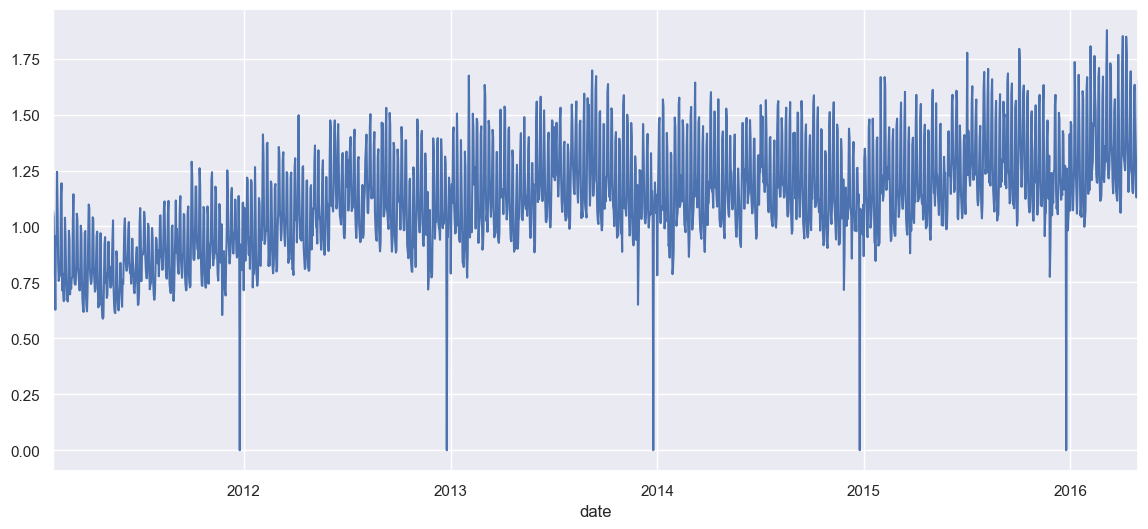

In [33]:
sns.set(rc={'figure.figsize':(14, 6)})

df_items_temp["avg_items_sold"].plot()

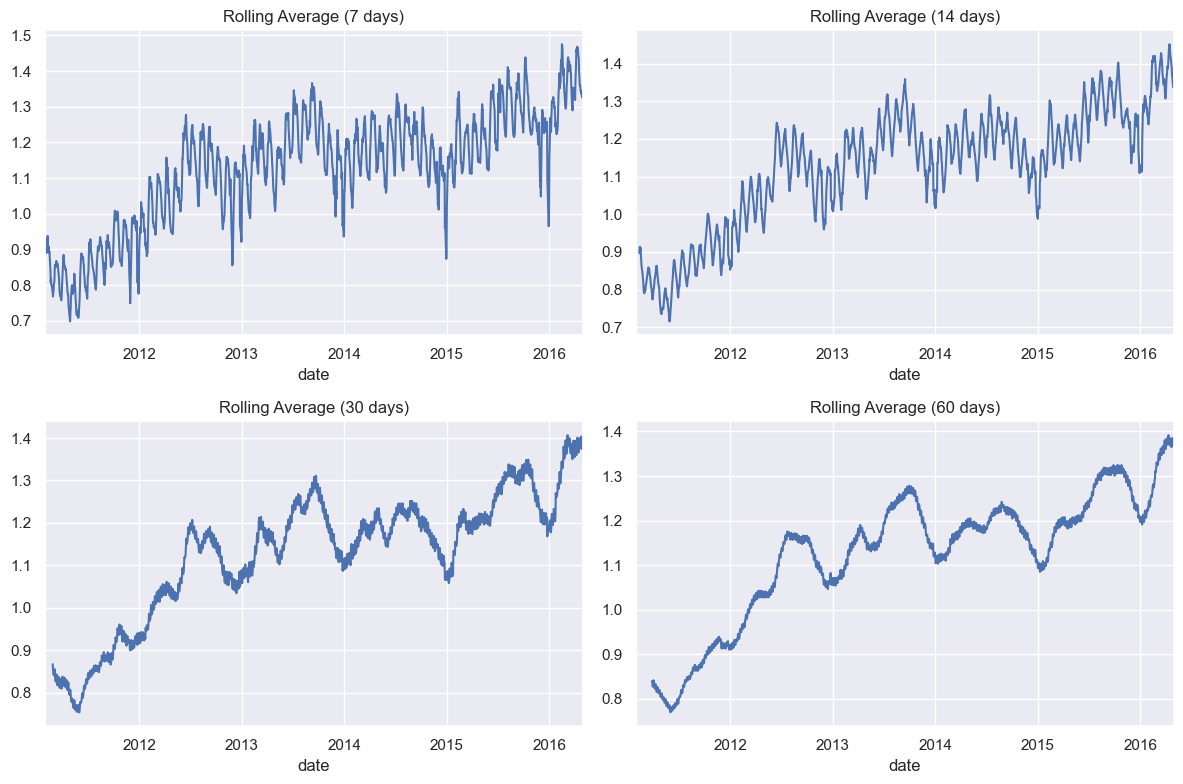

In [34]:
plot_rolling_average(df_items_temp["avg_items_sold"])

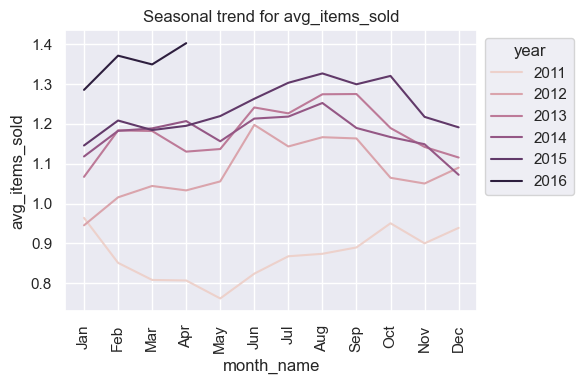

In [68]:
plot_seasonal("month_name", ["avg_items_sold"], "year", df_items_temp, 1, 1, 6, 4)

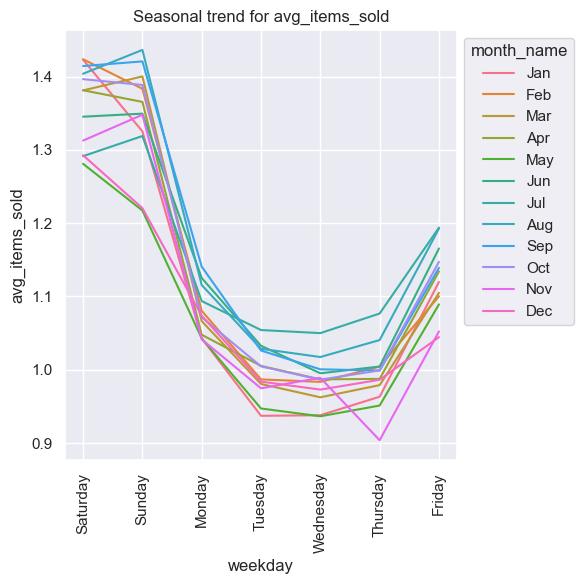

In [83]:
plot_seasonal("weekday", ["avg_items_sold"], "month_name", df_items_temp, 1, 1, 6, 6)

### Modelling specific plots

#### Decomposition plots

There is an increasing trend in items sold over time. There is a sharp drop in items sold towards the end of each year. However, variance does not seem to change much over each year as the residuals are clustered around the same area without any positive trend

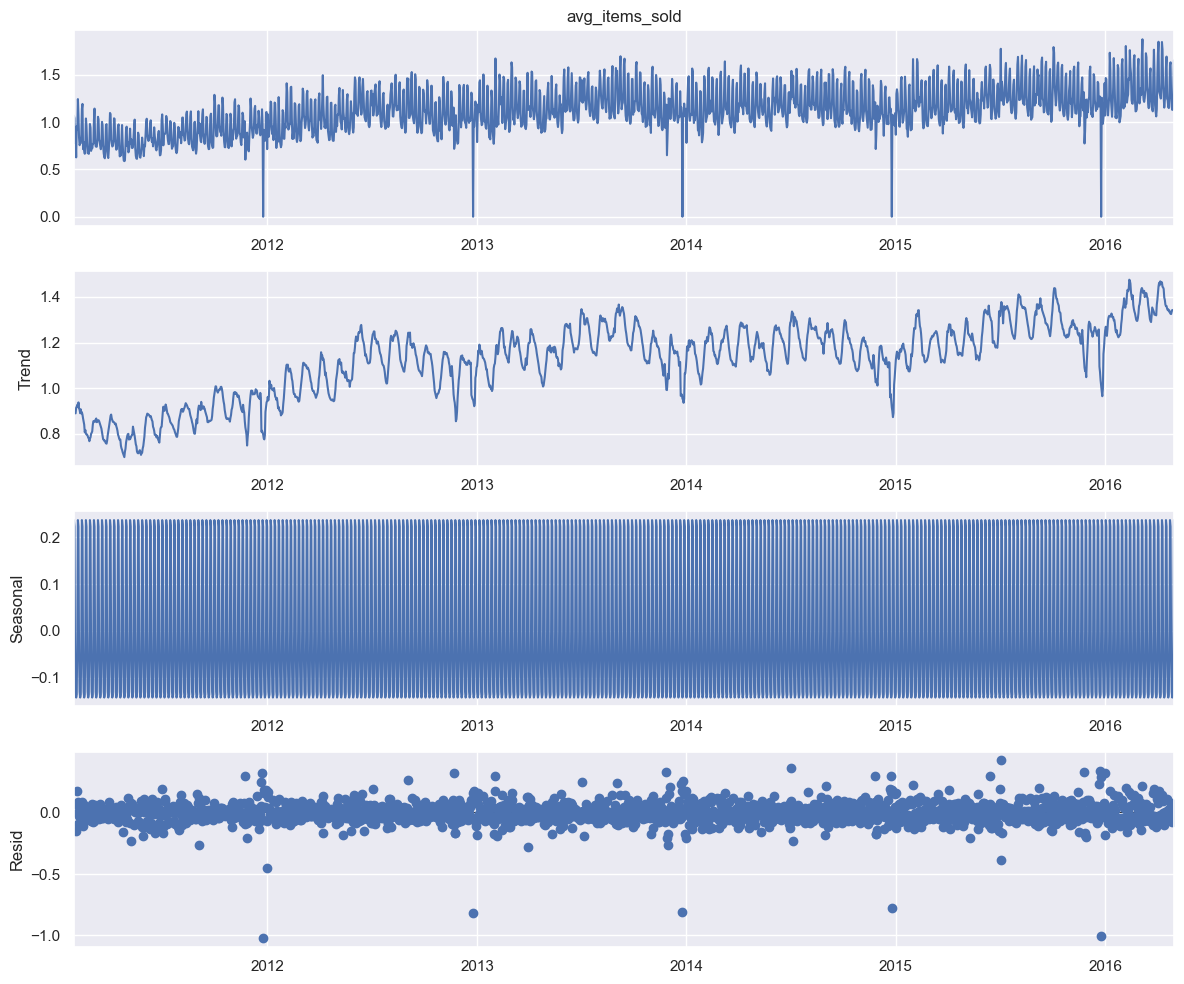

In [46]:
sns.set(rc={'figure.figsize':(12, 10)})

decomposed_result = sm.tsa.seasonal_decompose(df_items_temp["avg_items_sold"], model = "additive")
decomposed_result.plot()
plt.show()

#### Tests for stationarity (ADF and KPSS)

Both confirm that the series is non stationary. So we probably need to difference the time series by 7 days to achieve stationarity so that the models can be fit.

We cannot reject the null hypothesis of the adf_test as p_value = 0.48 > 0.05. Hence series is non-stationary.

In [50]:
adf_test(df_items_temp["avg_items_sold"])

Results of Dickey-Fuller Test:
Test Statistic                   -1.602145
p-value                           0.482516
#Lags Used                       26.000000
Number of Observations Used    1892.000000
Critical Value (1%)              -3.433811
Critical Value (5%)              -2.863069
Critical Value (10%)             -2.567584
dtype: float64


We can reject the null hypothesis of the kpss test as p_valie = 0.01 < 0.05. Hence series is also non-stationary.

In [51]:
kpss_test(df_items_temp["avg_items_sold"])

Results of KPSS Test:
Test Statistic            6.443358
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\Tristan\Desktop\Assignments\ADS\ads-final-project\ads_env\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


#### Seasonal trend observed every week: Lag 1, 7, 14, 21 and 28 are all the most linear plots.

So we can infer that there is a weekly cycle of number of items sold.

Also the price and items sold have increased gradually over time.

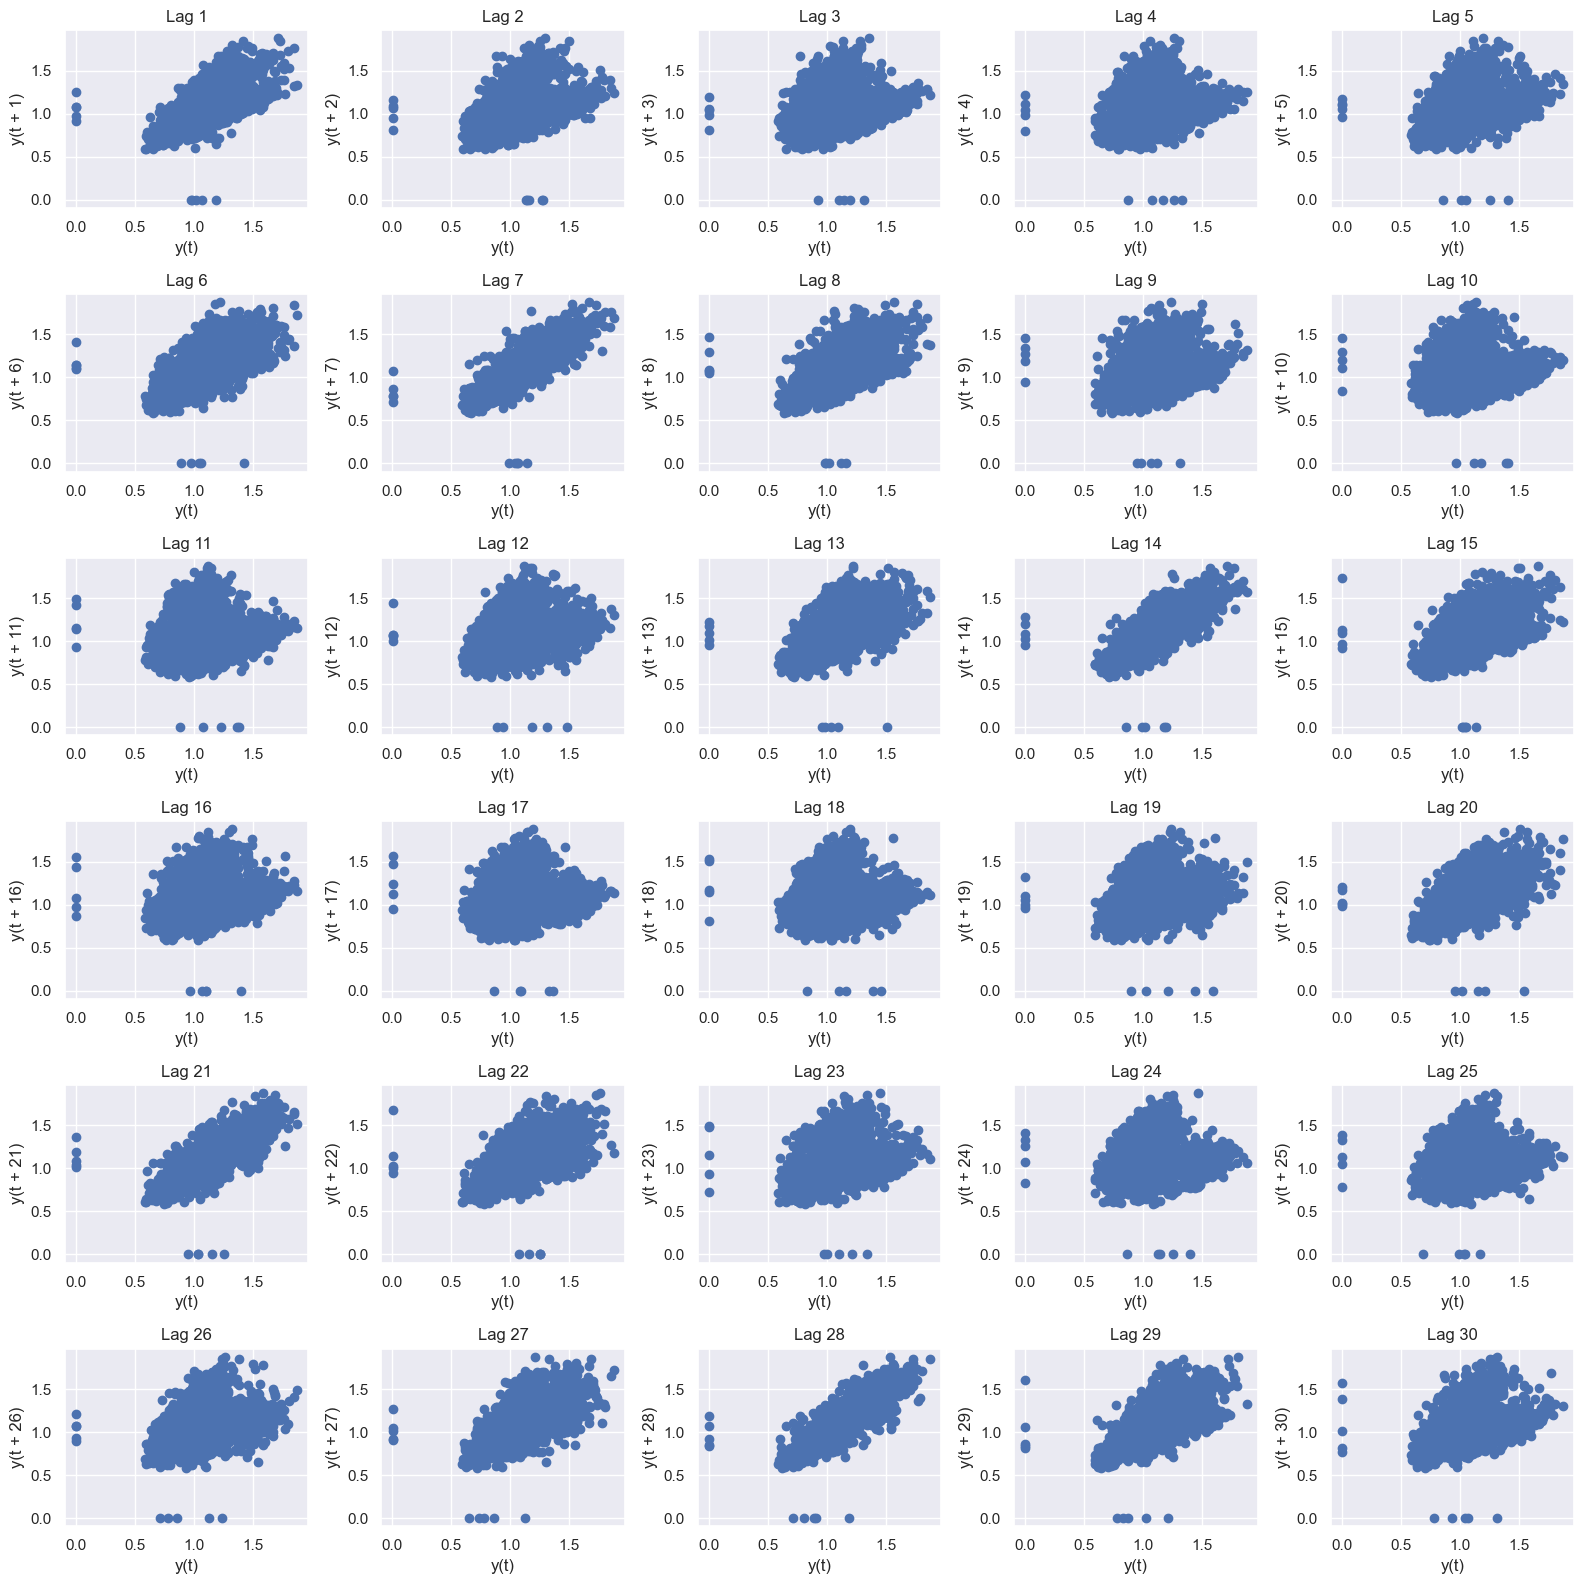

In [ ]:
plot_lags(df_items_temp["avg_items_sold"])

#### ACF and PACF plots: Seasonality observed every 7 days from ACF plots 

How to interpret [plots](https://www.datalytyx.com/choosing-the-right-forecast-model-for-time-series-data/#:~:text=ARMA%20models%20are%20one%20such,be%20dependent%20on%20previous%20points.):

Each bar represents the correlation between the original series and its kth lag. The first bar is always equal to one as this is simply measuring the variable correlated with itself. The blue line apparent in any plot represents statistically significant values other than 0, meaning any bars underneath this threshold are not statistically significant. The method to distinguish between AR and MA processes comes from observing which graph falls below this line first. If the PACF graph becomes insignificant before the ACF plot then the series is mostly an AR process. For instance, in the top two images the PACF becomes insignificant after the second lag, meaning it is an AR(2) process. On the other hand in the bottom images the ACF plot becomes insignificant after the 2nd bar, meaning it is mostly a MA(2) process.

So, the ACF plot becomes insignificant at lag 9, while the PACF becomes insignificant at lag 12. So the timeseries is mostly a MA(8) process? 

Though the subsequent points are still significant especially every 6 / 7 lags. So not sure if we can conclude so readily from the plots.

Maybe we need ARIMA(11, 7, 8), because we have to difference for 1 week, and the AR(11) because PACF becomes insignificant at lag 12, and MA(8) as ACF becomes insiginificant at lag 9.

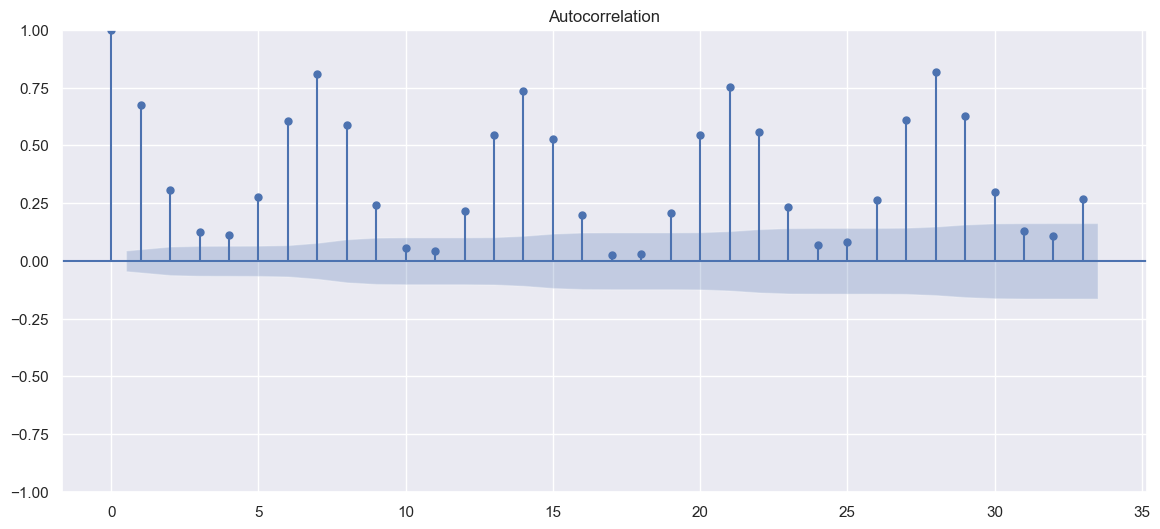

In [43]:
sm.graphics.tsa.plot_acf(df_items_temp["avg_items_sold"])
plt.show()

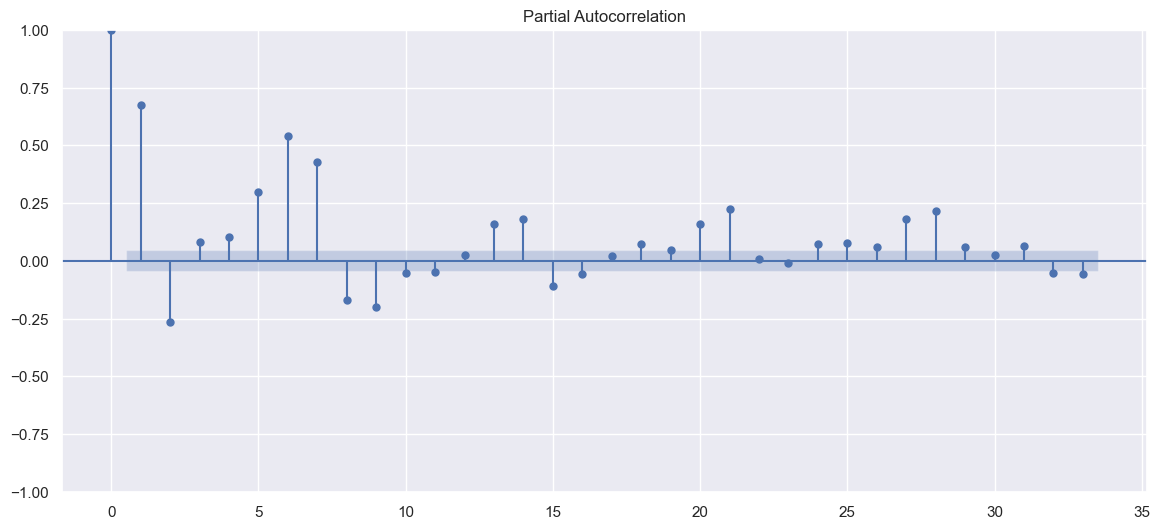

In [41]:
sm.graphics.tsa.plot_pacf(df_items_temp["avg_items_sold"], method = "ywm")
plt.show()

### Items averaged over the category

In [24]:
df_cat_temp = df_train.groupby(["category_id"]).mean()
df_cat_temp.reset_index(inplace=True)

df_cat_temp = pd.DataFrame(
    data = {
    "d" : df_cat_temp.columns[1:],
    "Beauty" : df_cat_temp.iloc[0, 1:],
    "Cleaning" : df_cat_temp.iloc[1, 1:],
    "Food" : df_cat_temp.iloc[2, 1:]
    }
)

df_cat_temp["d"] = df_cat_temp["d"].astype("string")

df_cat_temp = pd.merge(df_cat_temp, df_cal, on = "d", how = "left")
df_cat_temp = df_cat_temp.set_index("date")

<AxesSubplot:xlabel='date'>

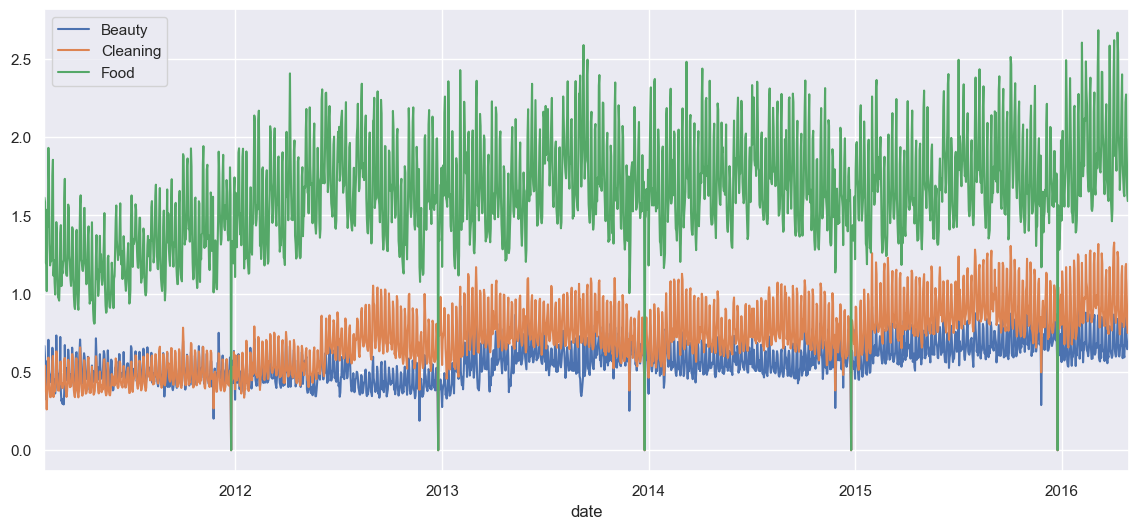

In [25]:
sns.set(rc={'figure.figsize':(14, 6)})

df_cat_temp[category_ls].plot()

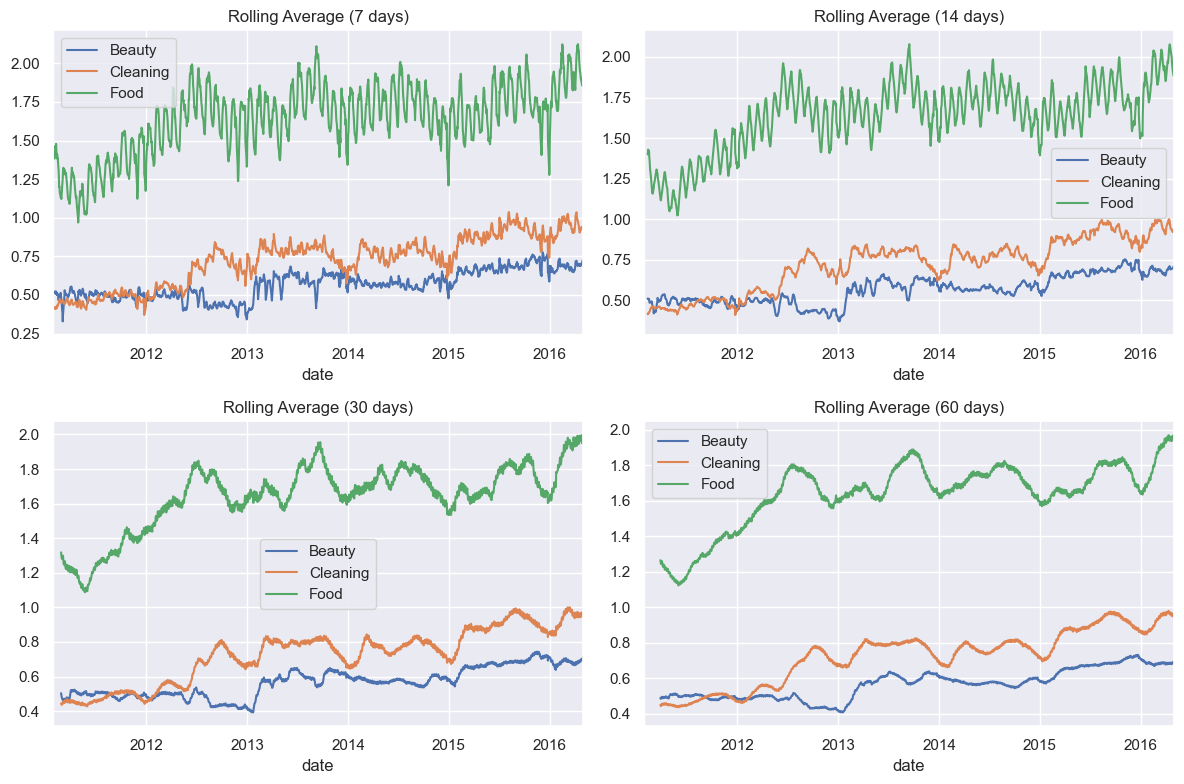

In [26]:
plot_rolling_average(df_cat_temp[category_ls])

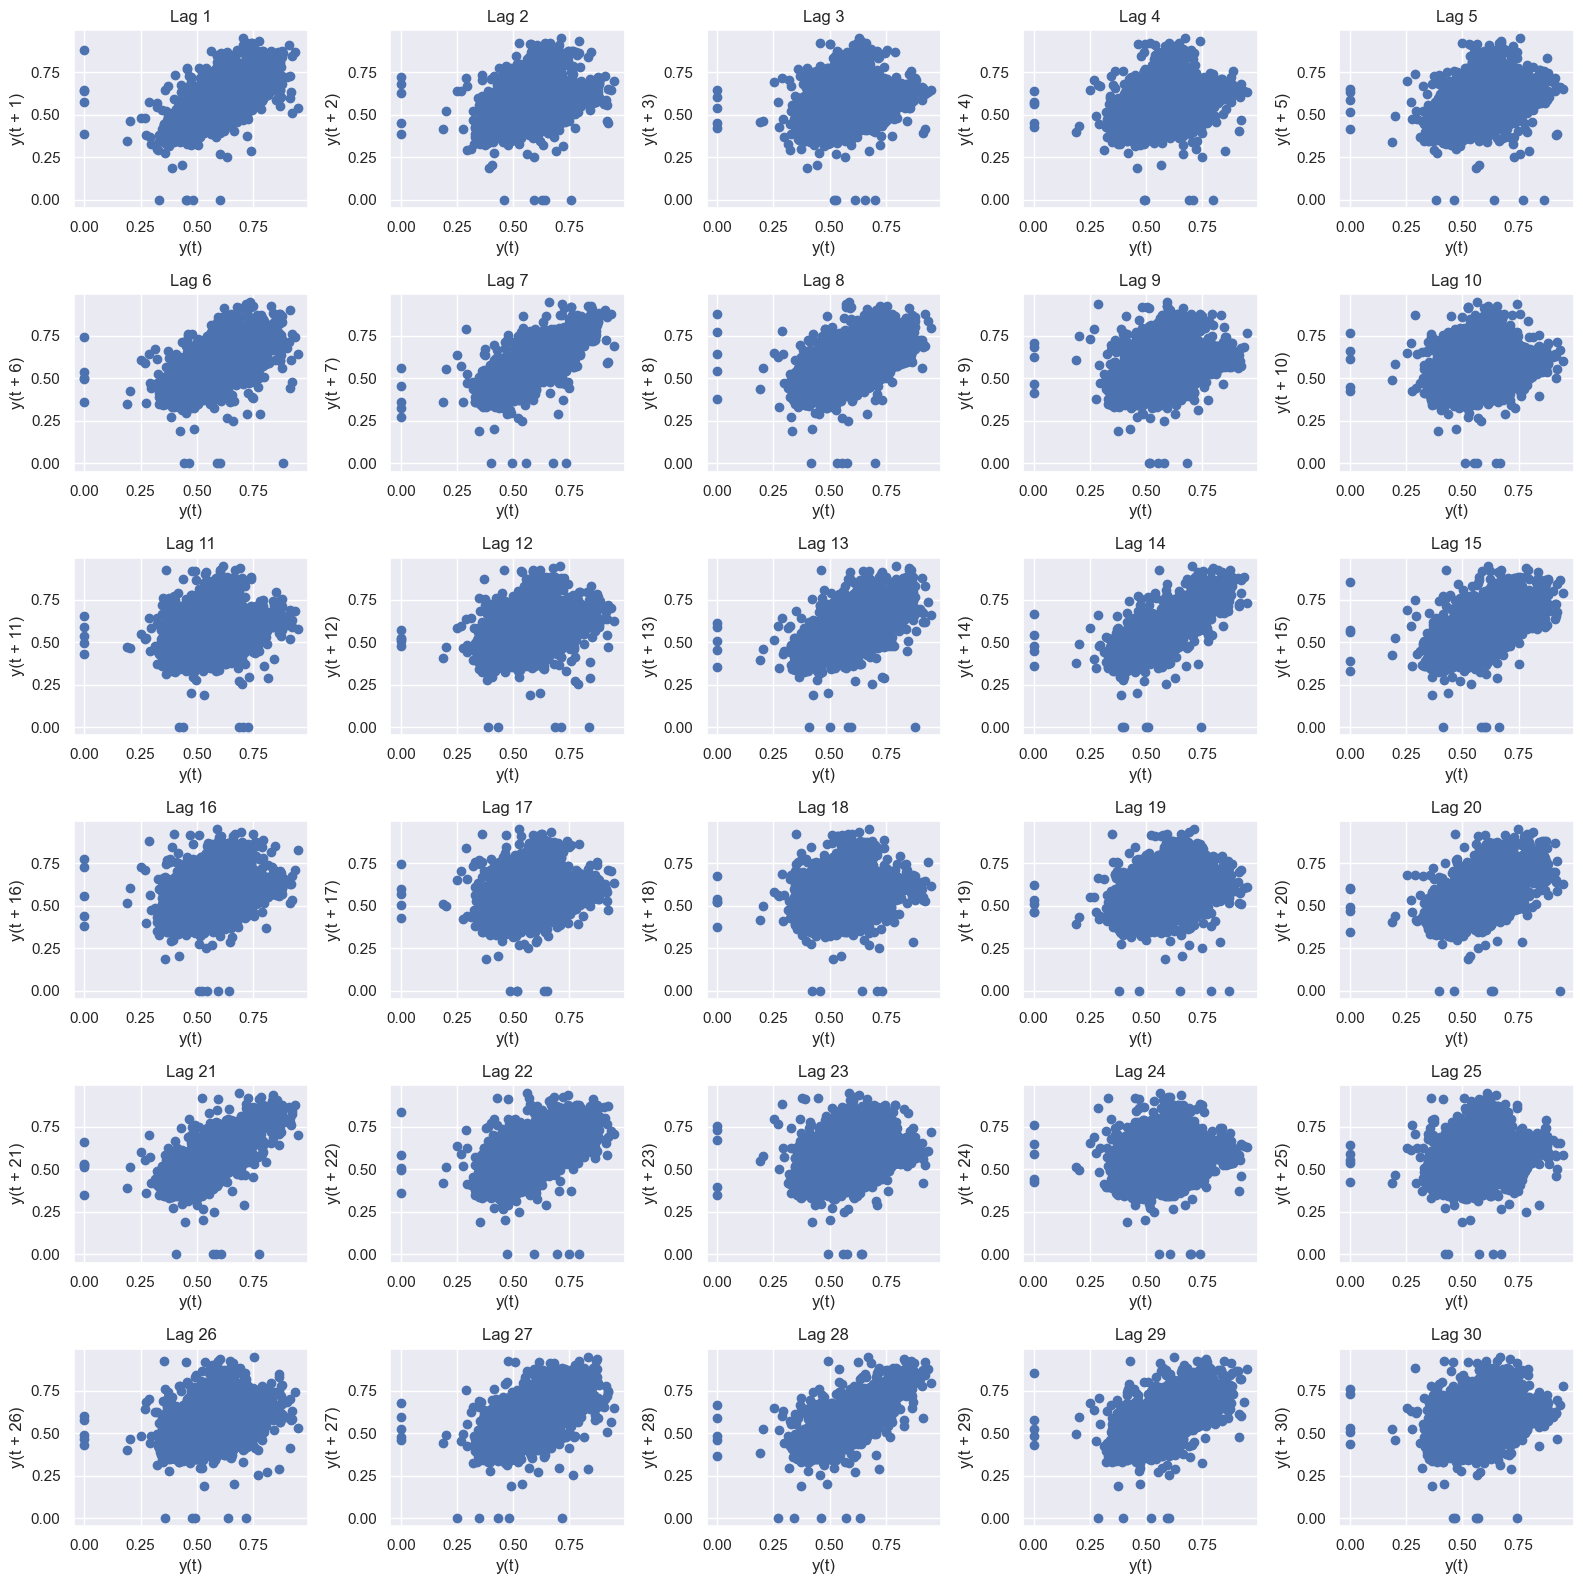

In [27]:
plot_lags(df_cat_temp["Beauty"])

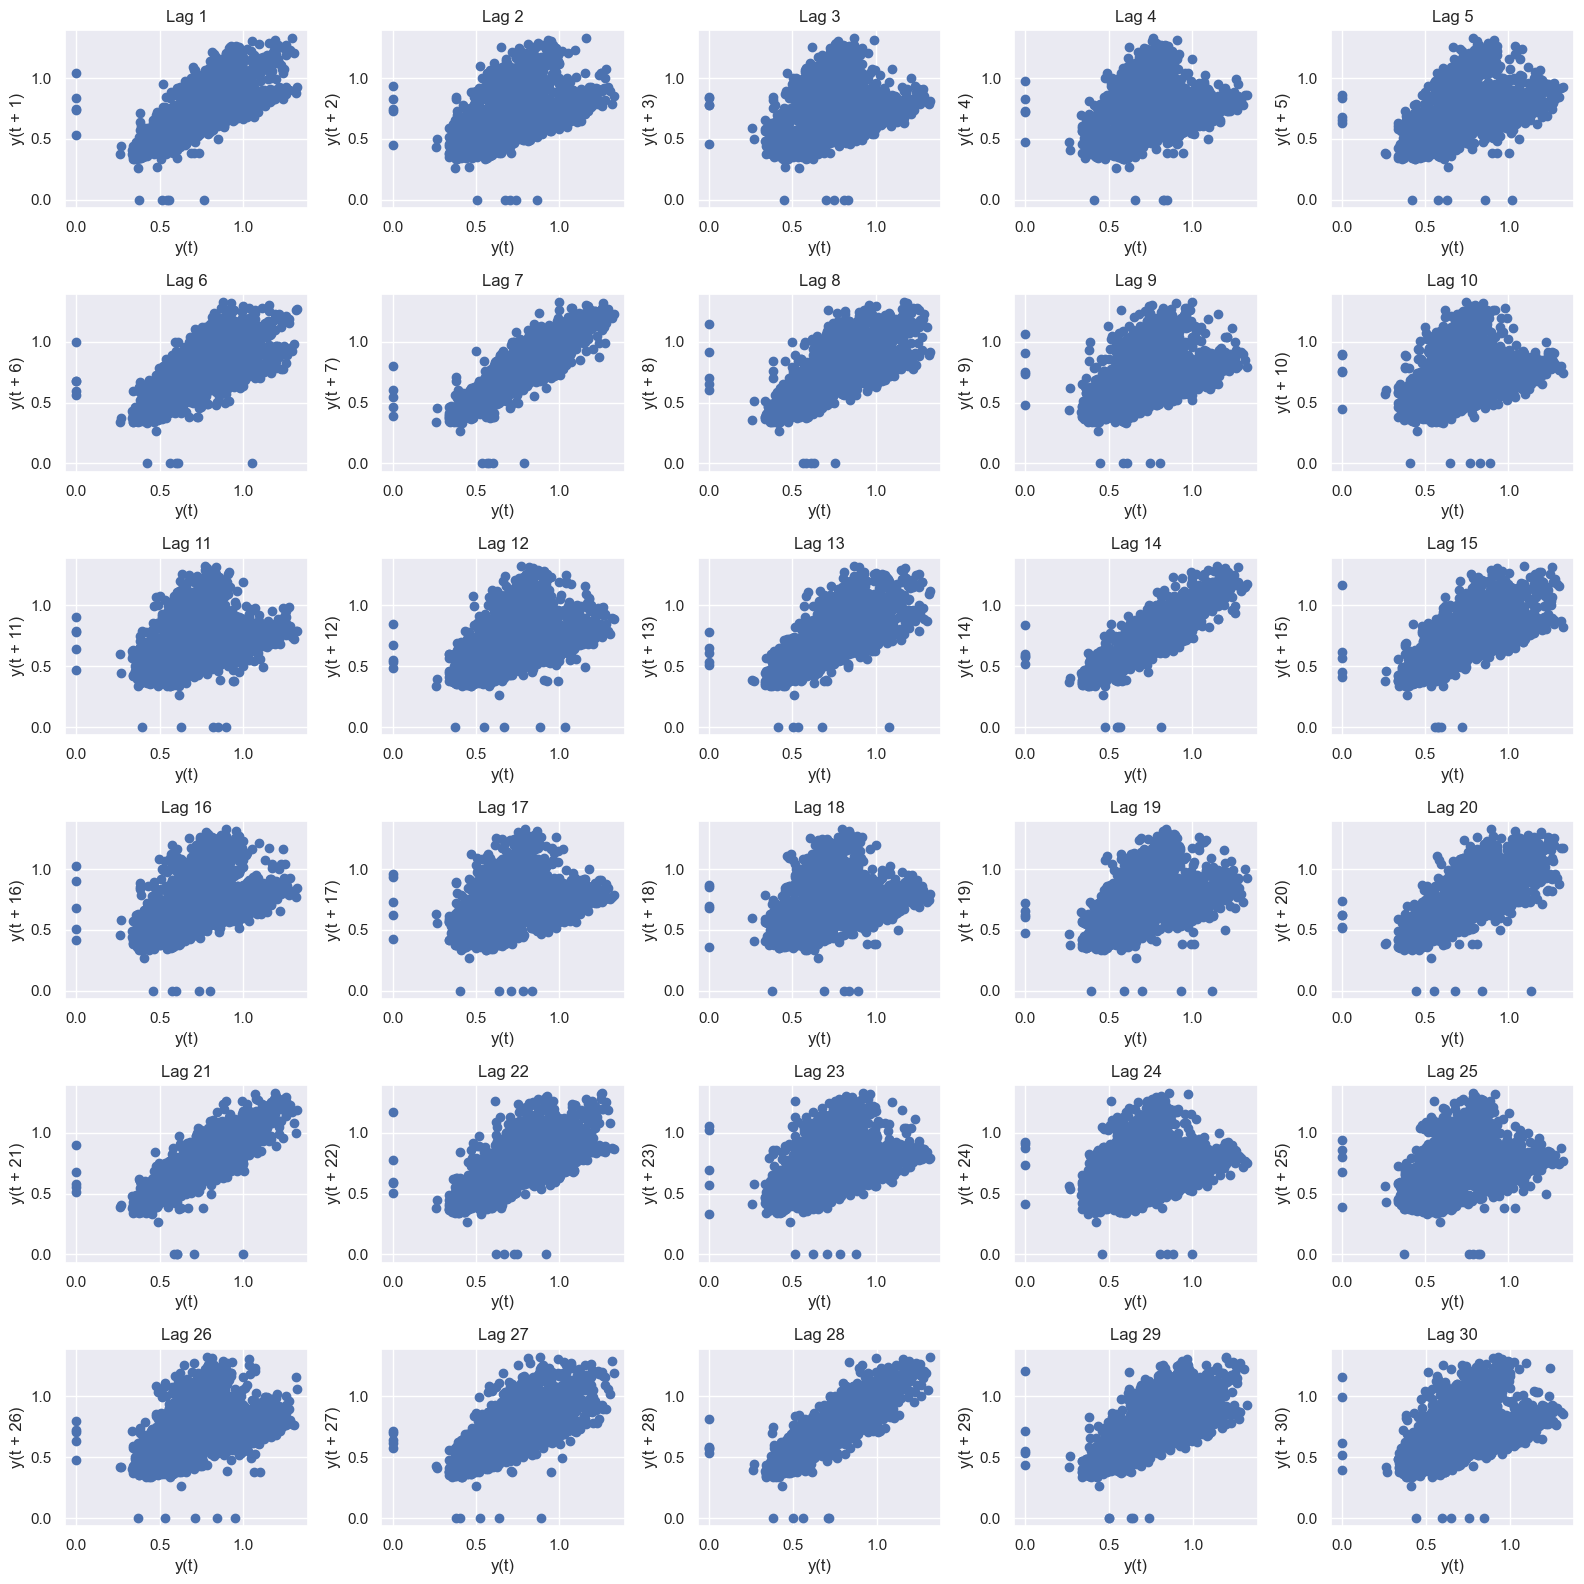

In [28]:
plot_lags(df_cat_temp["Cleaning"])

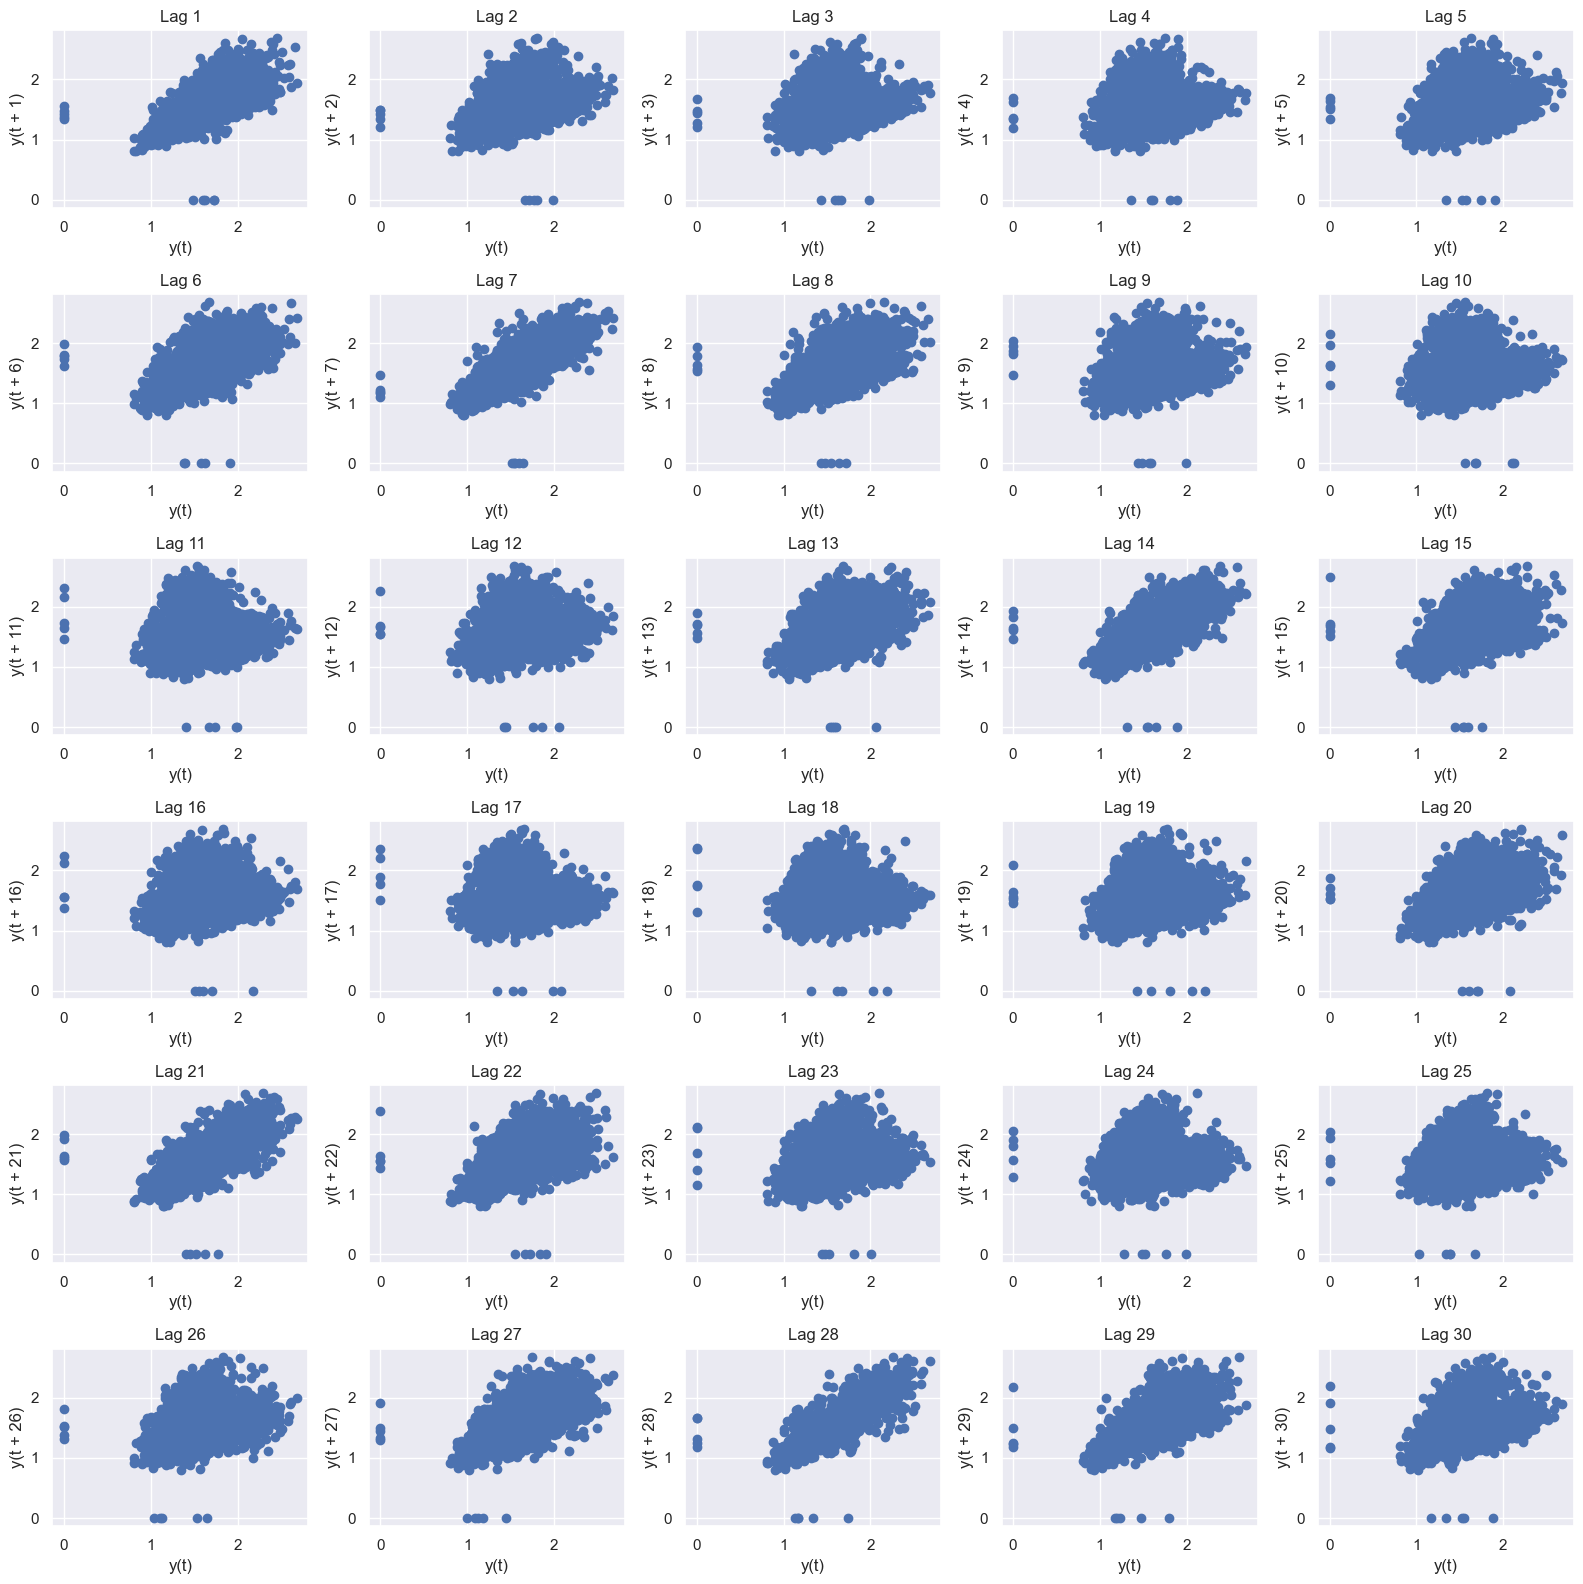

In [29]:
plot_lags(df_cat_temp["Food"])

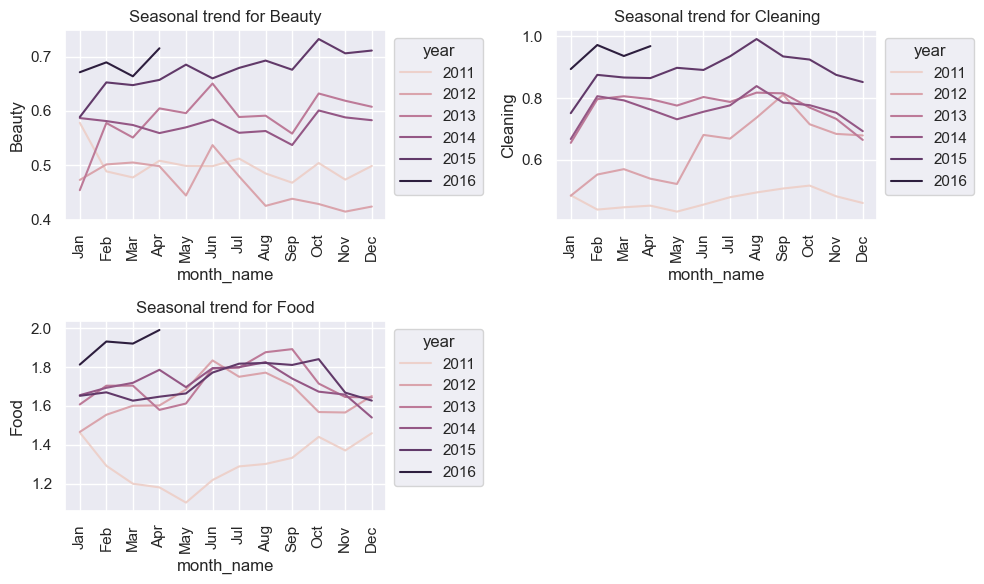

In [73]:
plot_seasonal("month_name", category_ls, "year", df_cat_temp, 2, 2, 10, 6)

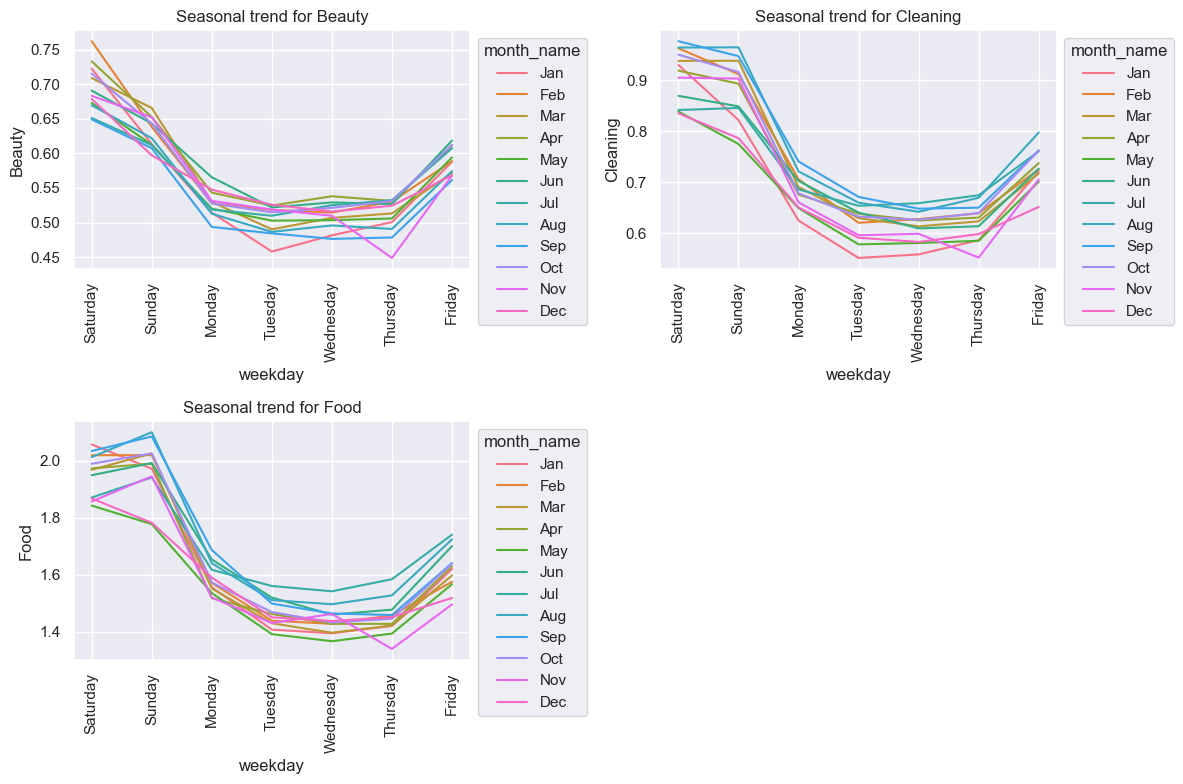

In [76]:
plot_seasonal("weekday", category_ls, "month_name", df_cat_temp, 2, 2, 12, 8)

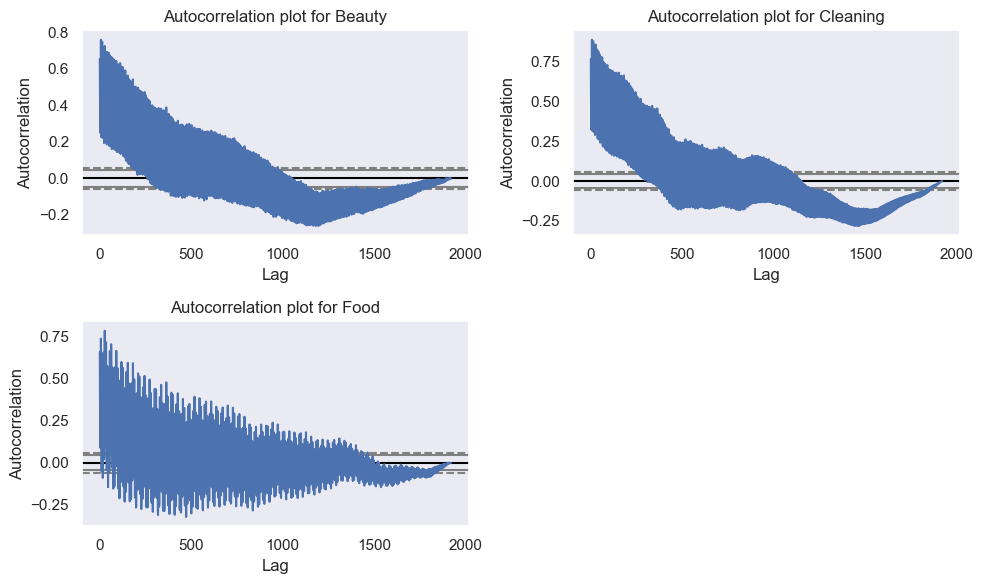

In [101]:
plot_autocorrelation(category_ls, df_cat_temp, 2, 2, 10, 6)

In [30]:
# Items averaged over the stores
df_store_temp = df_train.groupby(["store_id"]).mean()
df_store_temp.reset_index(inplace=True)

df_store_temp = pd.DataFrame(
    data = {
    "d" : df_store_temp.columns[1:],
    "Central_1" : df_store_temp.iloc[0, 1:],
    "Central_2" : df_store_temp.iloc[1, 1:],
    "Central_3" : df_store_temp.iloc[2, 1:],
    "East_1" : df_store_temp.iloc[3, 1:],
    "East_2" : df_store_temp.iloc[4, 1:],
    "East_3" : df_store_temp.iloc[5, 1:],
    "East_4" : df_store_temp.iloc[6, 1:],
    "West_1" : df_store_temp.iloc[7, 1:],
    "West_2" : df_store_temp.iloc[8, 1:],
    "West_3" : df_store_temp.iloc[9, 1:],
    }
)

df_store_temp["d"] = df_store_temp["d"].astype("string")

df_store_temp = pd.merge(df_store_temp, df_cal, on = "d", how = "left")
df_store_temp = df_store_temp.set_index("date")

<AxesSubplot:xlabel='date'>

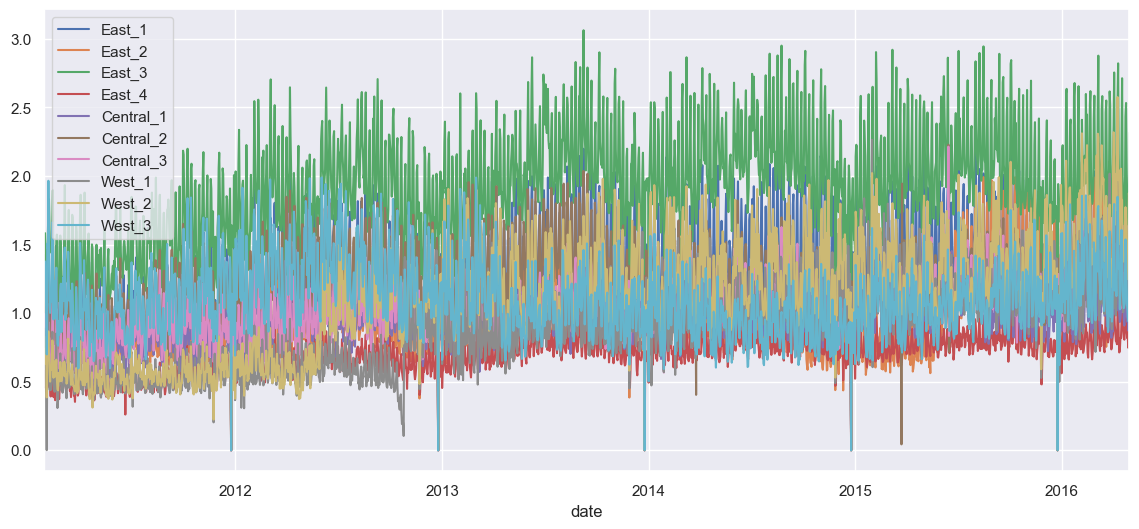

In [31]:
sns.set(rc={'figure.figsize':(14, 6)})

df_store_temp[store_ls].plot()

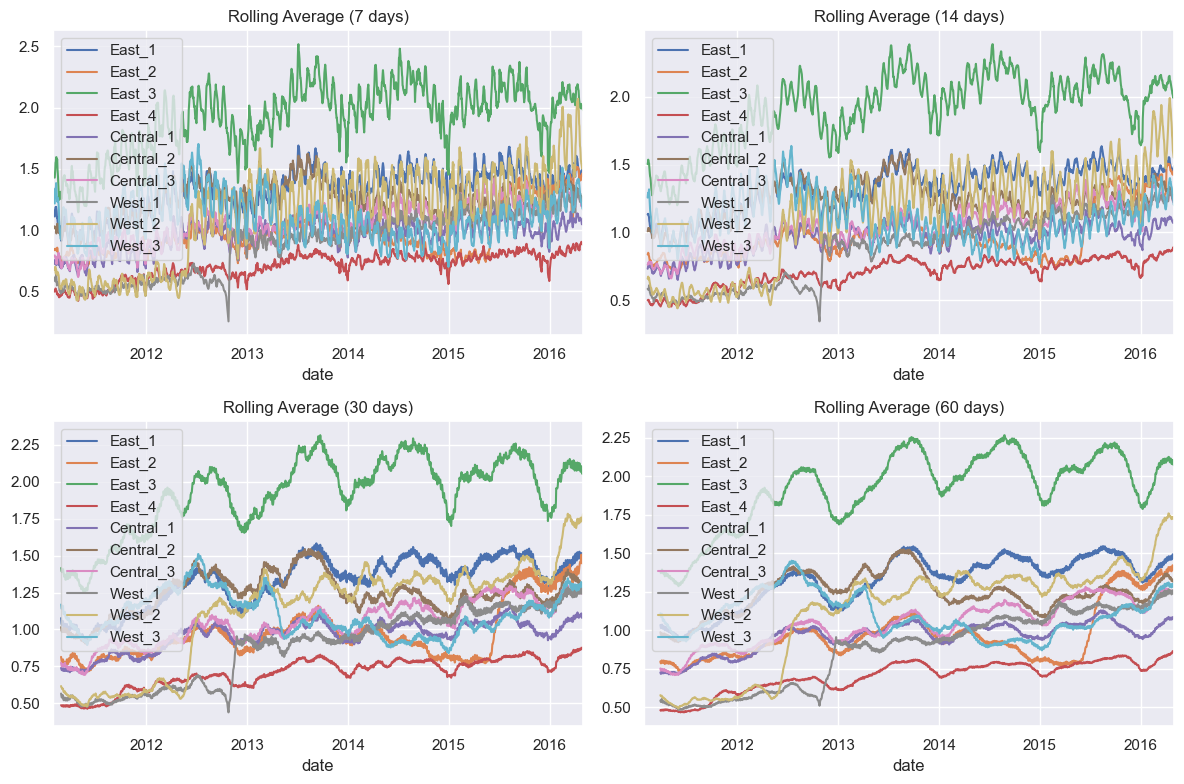

In [32]:
plot_rolling_average(df_store_temp[store_ls])

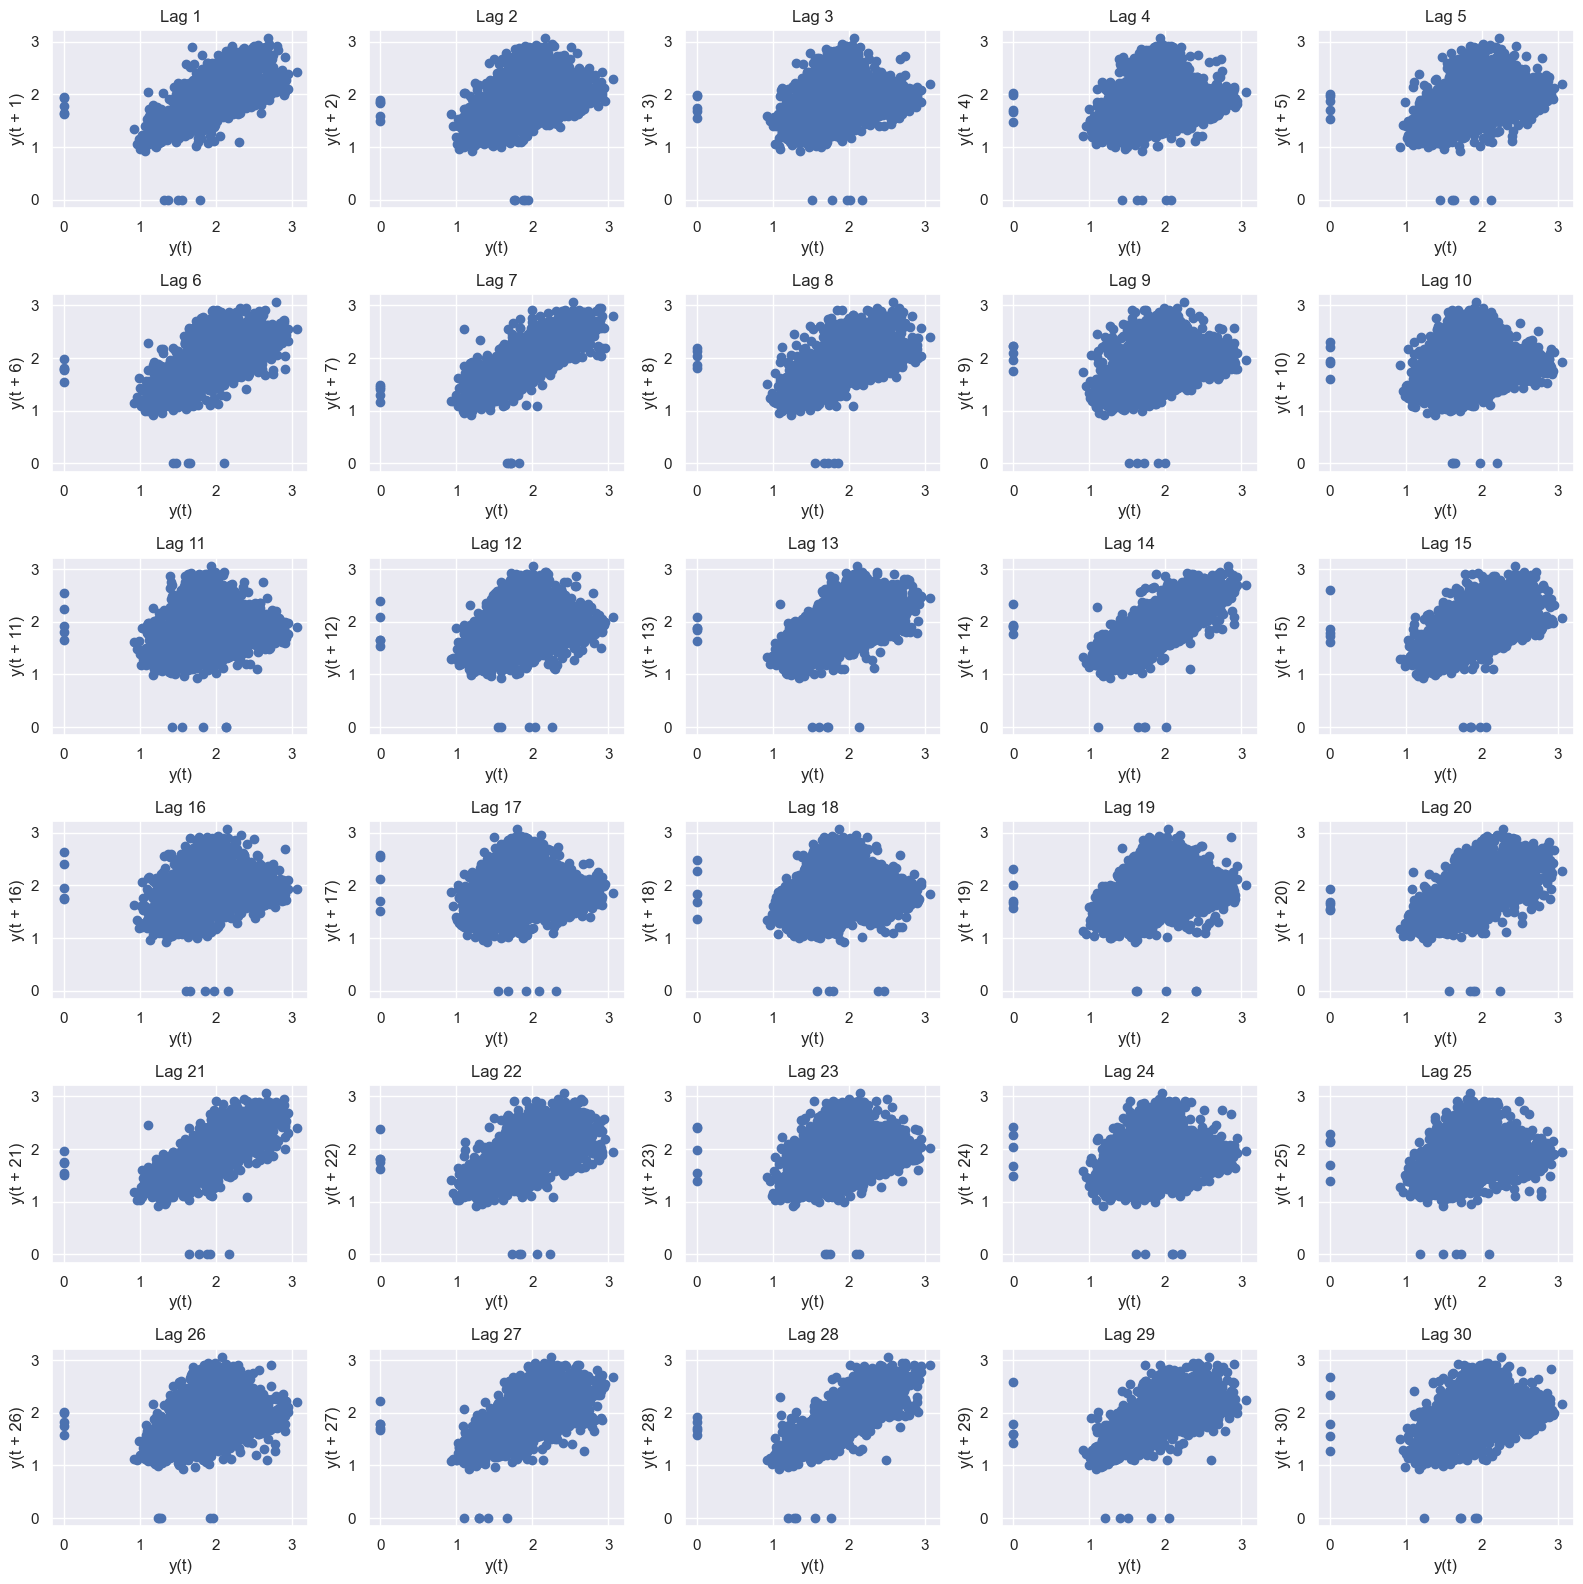

In [33]:
# Highest number of items sold
plot_lags(df_store_temp["East_3"])

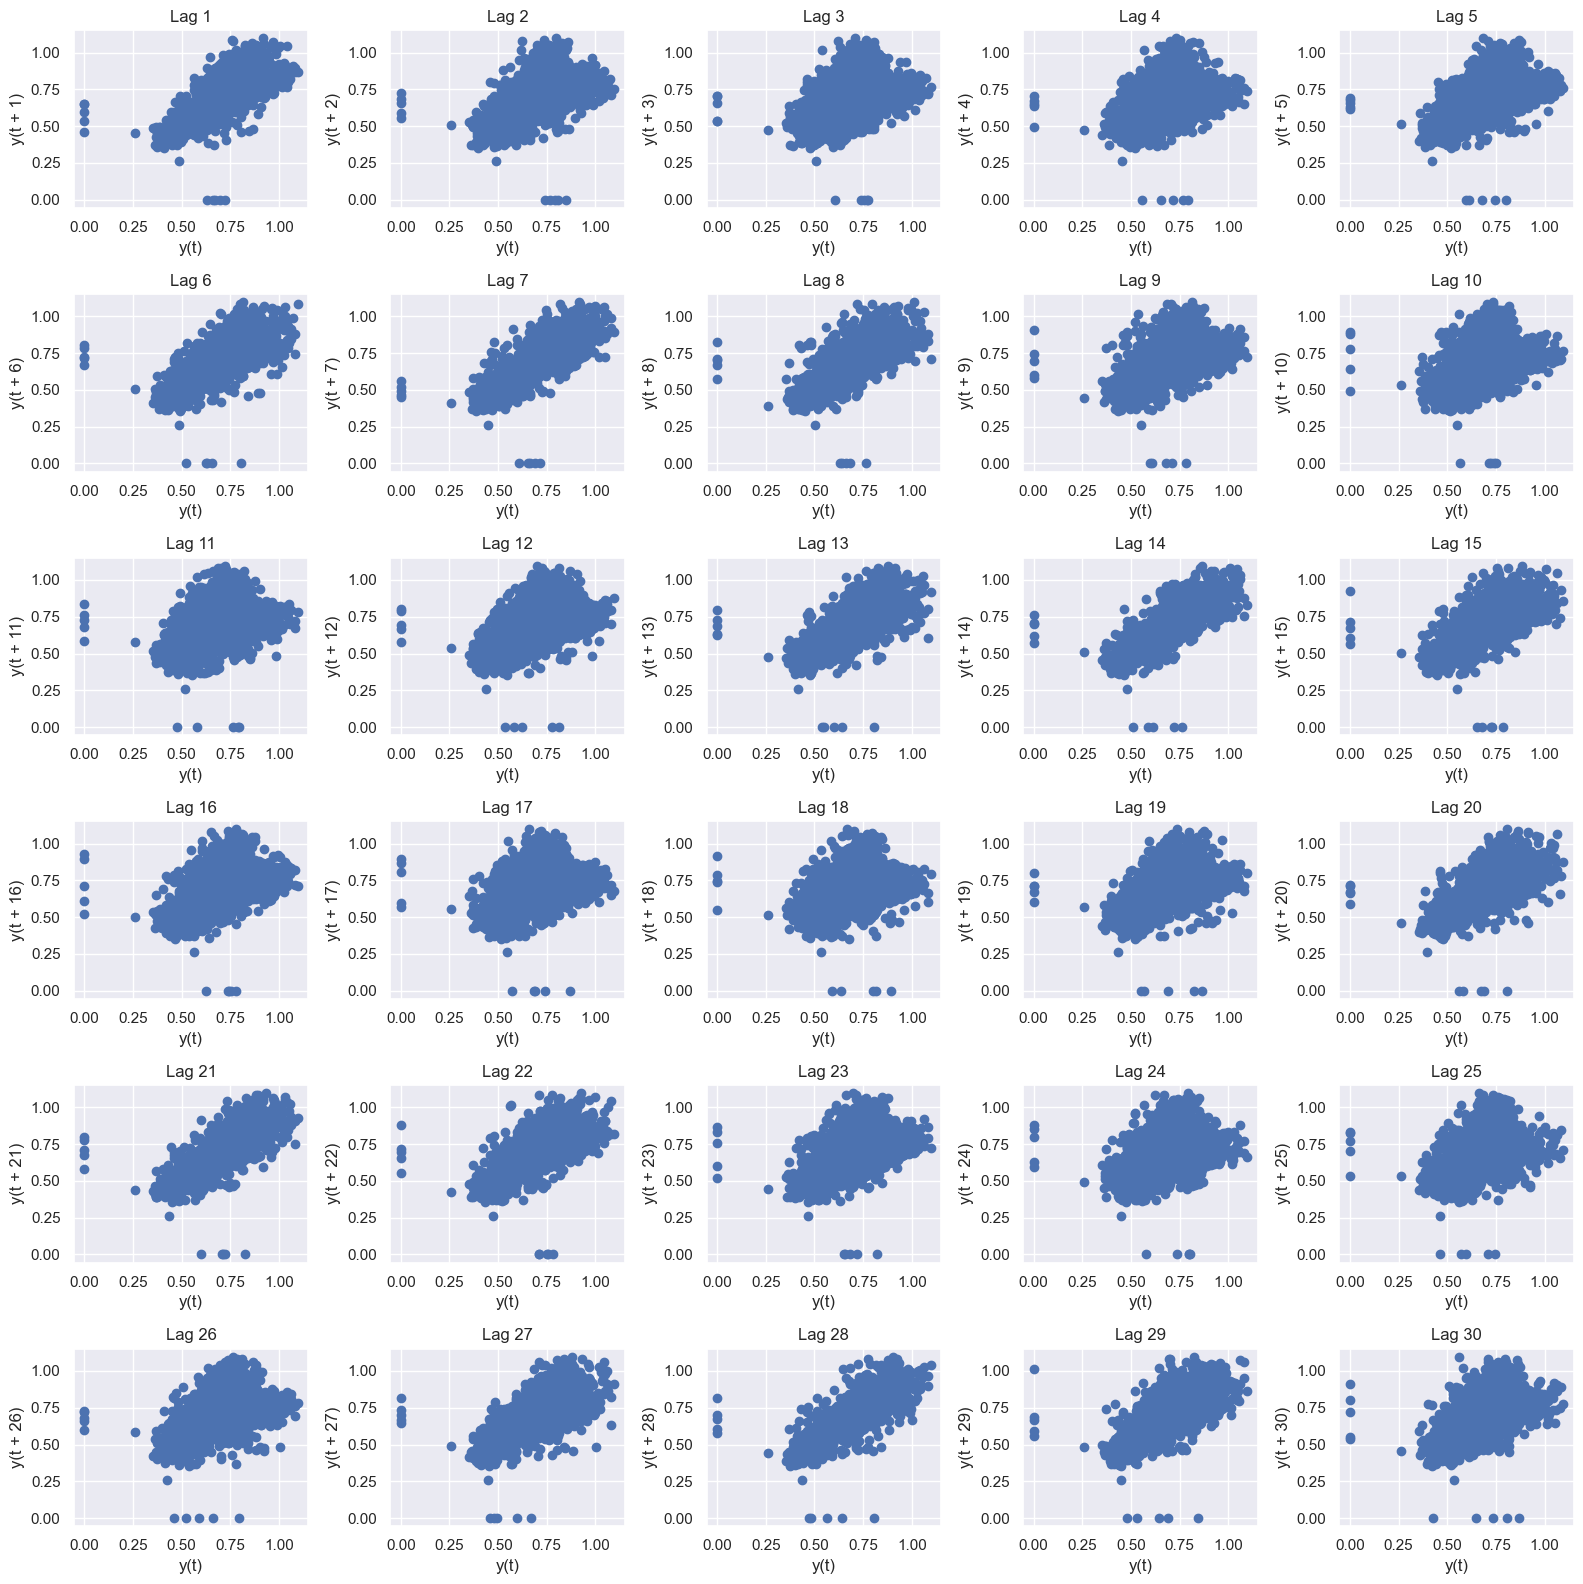

In [34]:
# Lowest number of items sold
plot_lags(df_store_temp["East_4"])

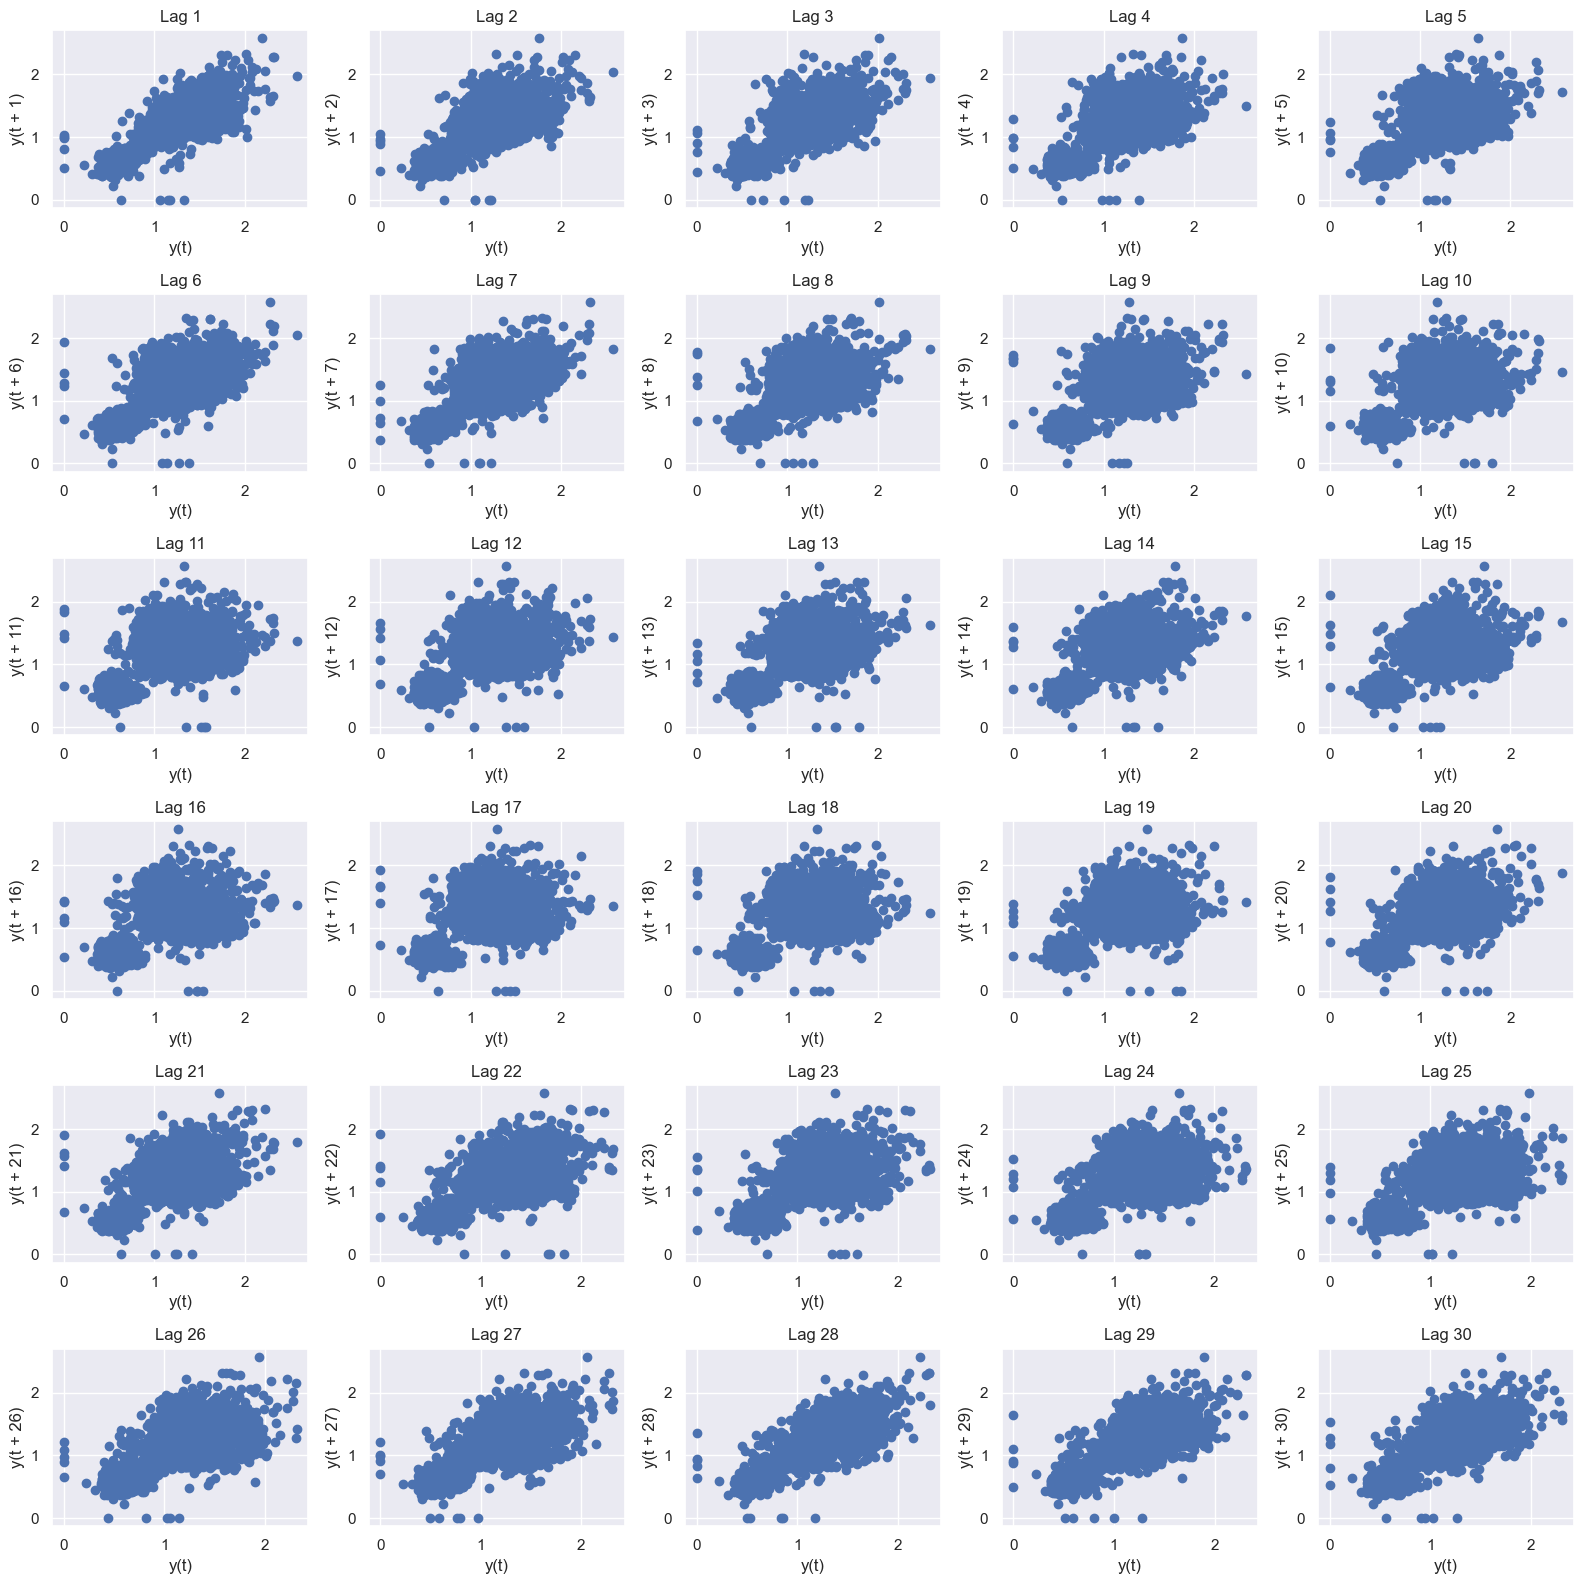

In [35]:
# Chose west 2 since there is a sudden spike in items around mid 2012
plot_lags(df_store_temp["West_2"])

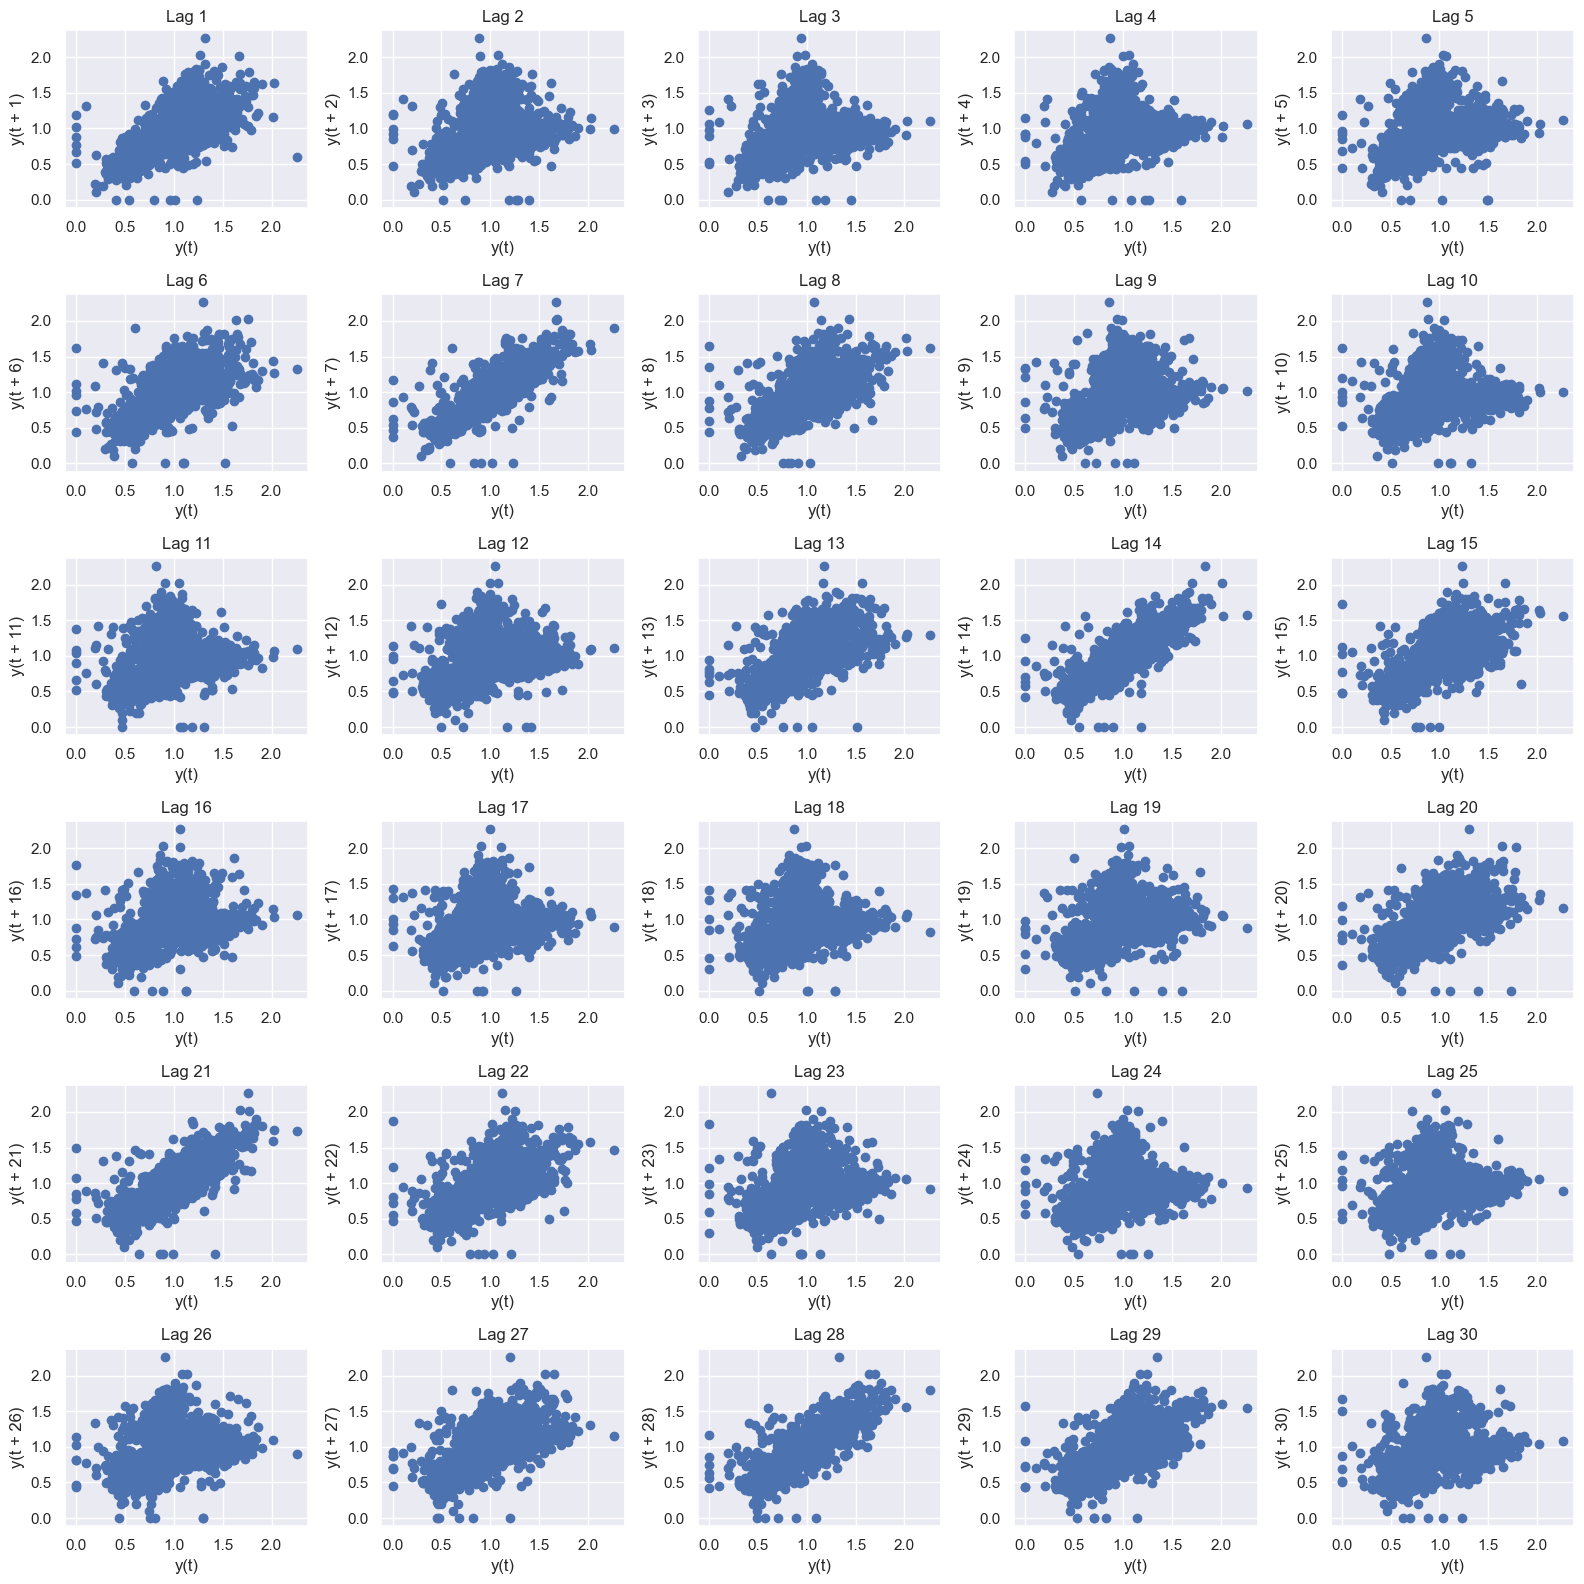

In [36]:
# West 1 also had a sudden spike around Oct 2012
plot_lags(df_store_temp["West_1"])

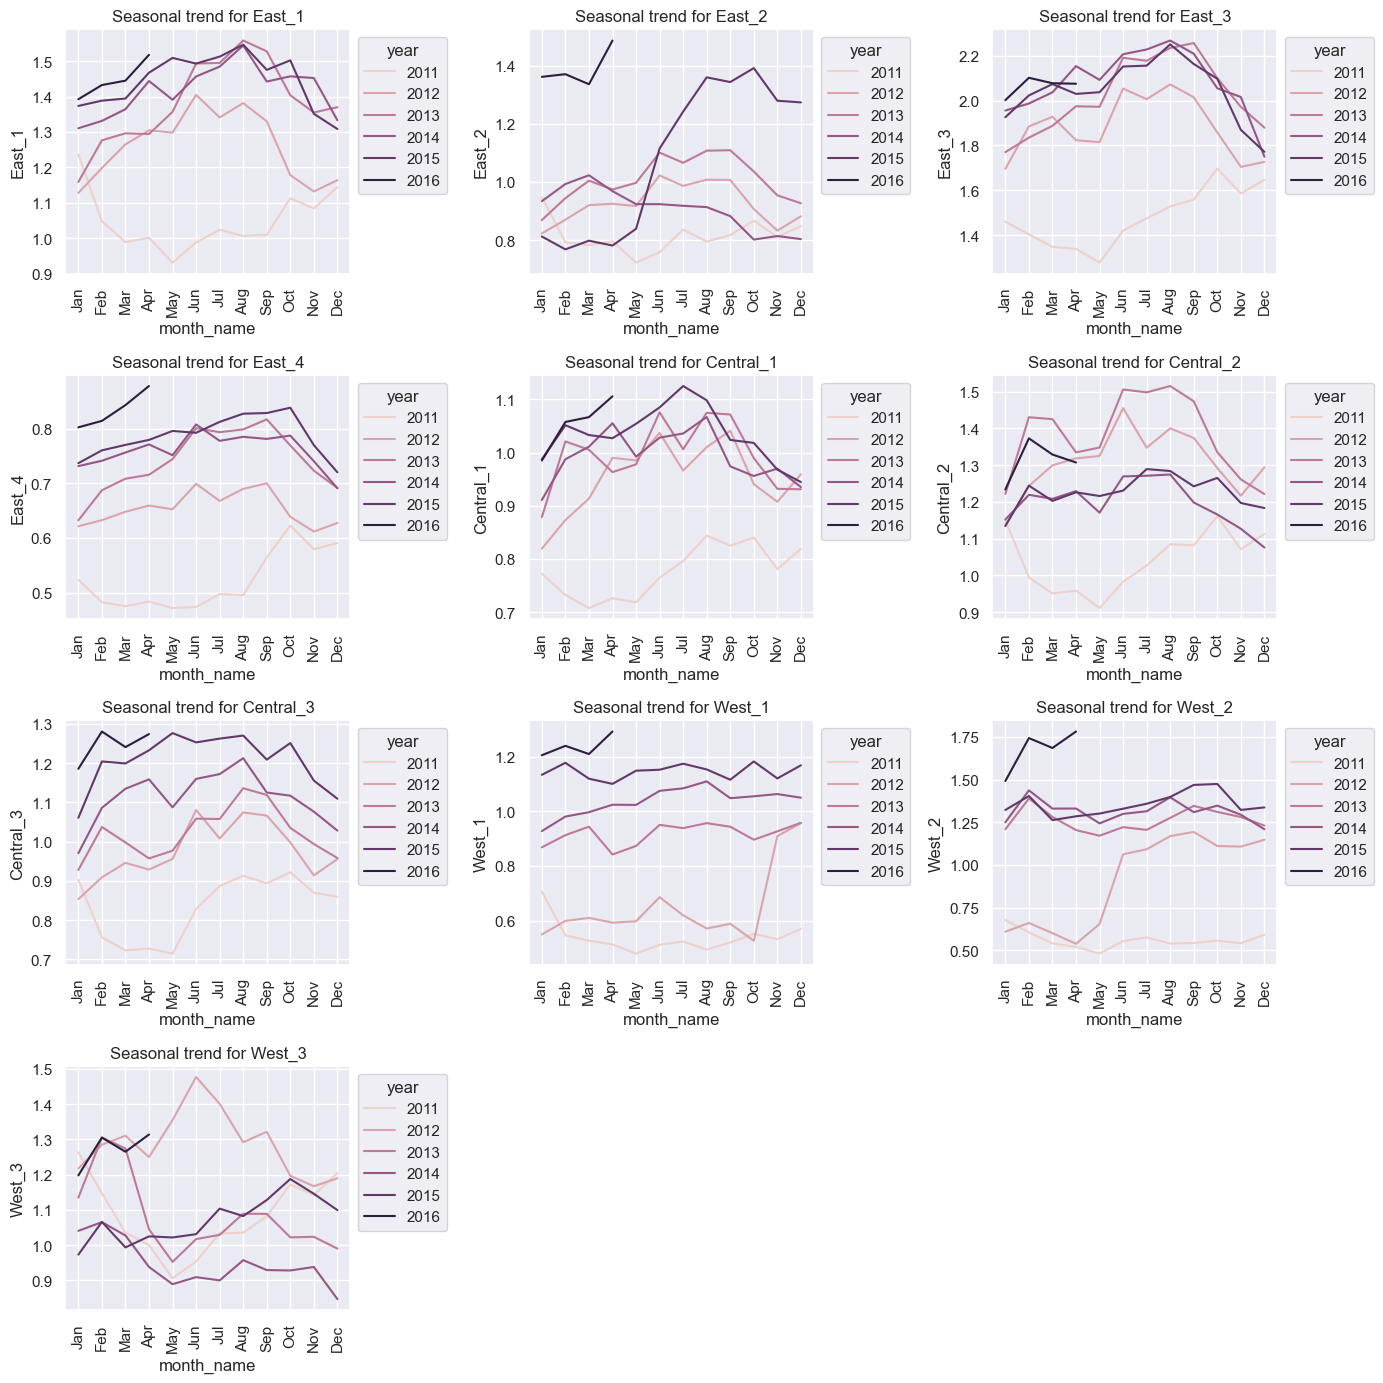

In [78]:
plot_seasonal("month_name", store_ls, "year", df_store_temp, 4, 3, 14, 14)

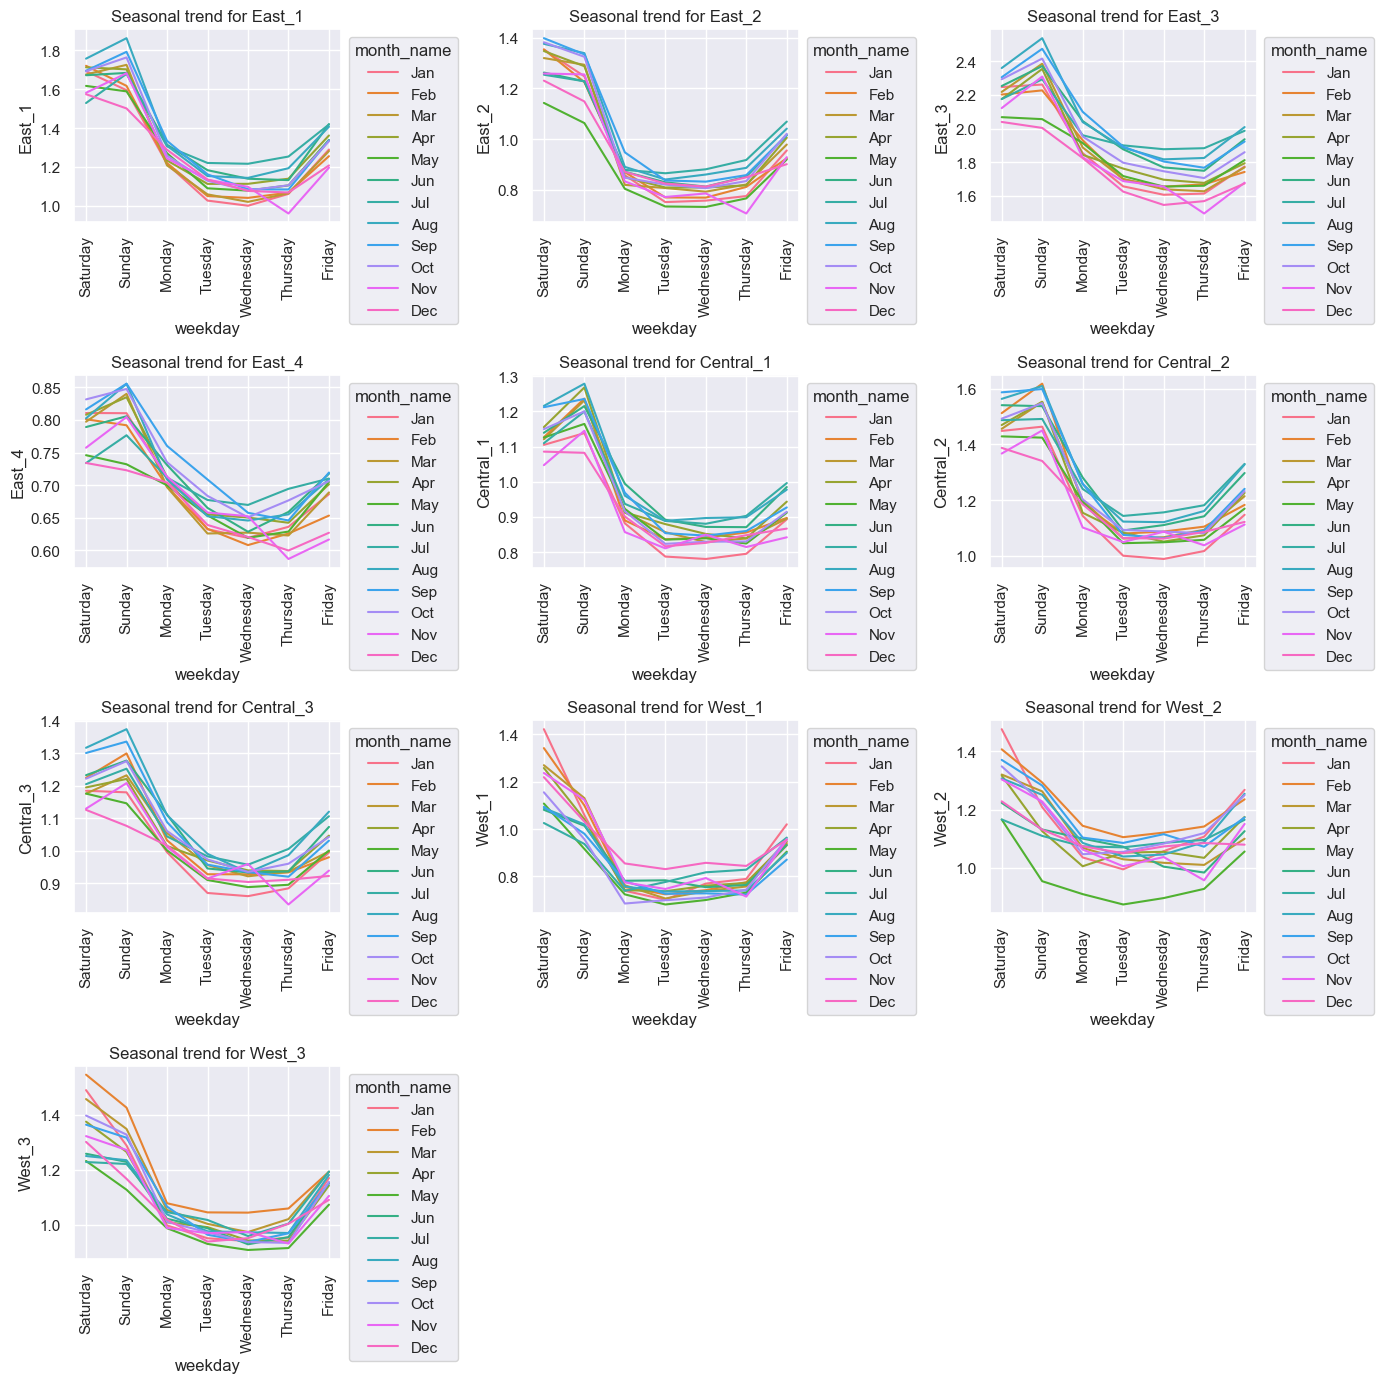

In [79]:
plot_seasonal("weekday", store_ls, "month_name", df_store_temp, 4, 3, 14, 14)

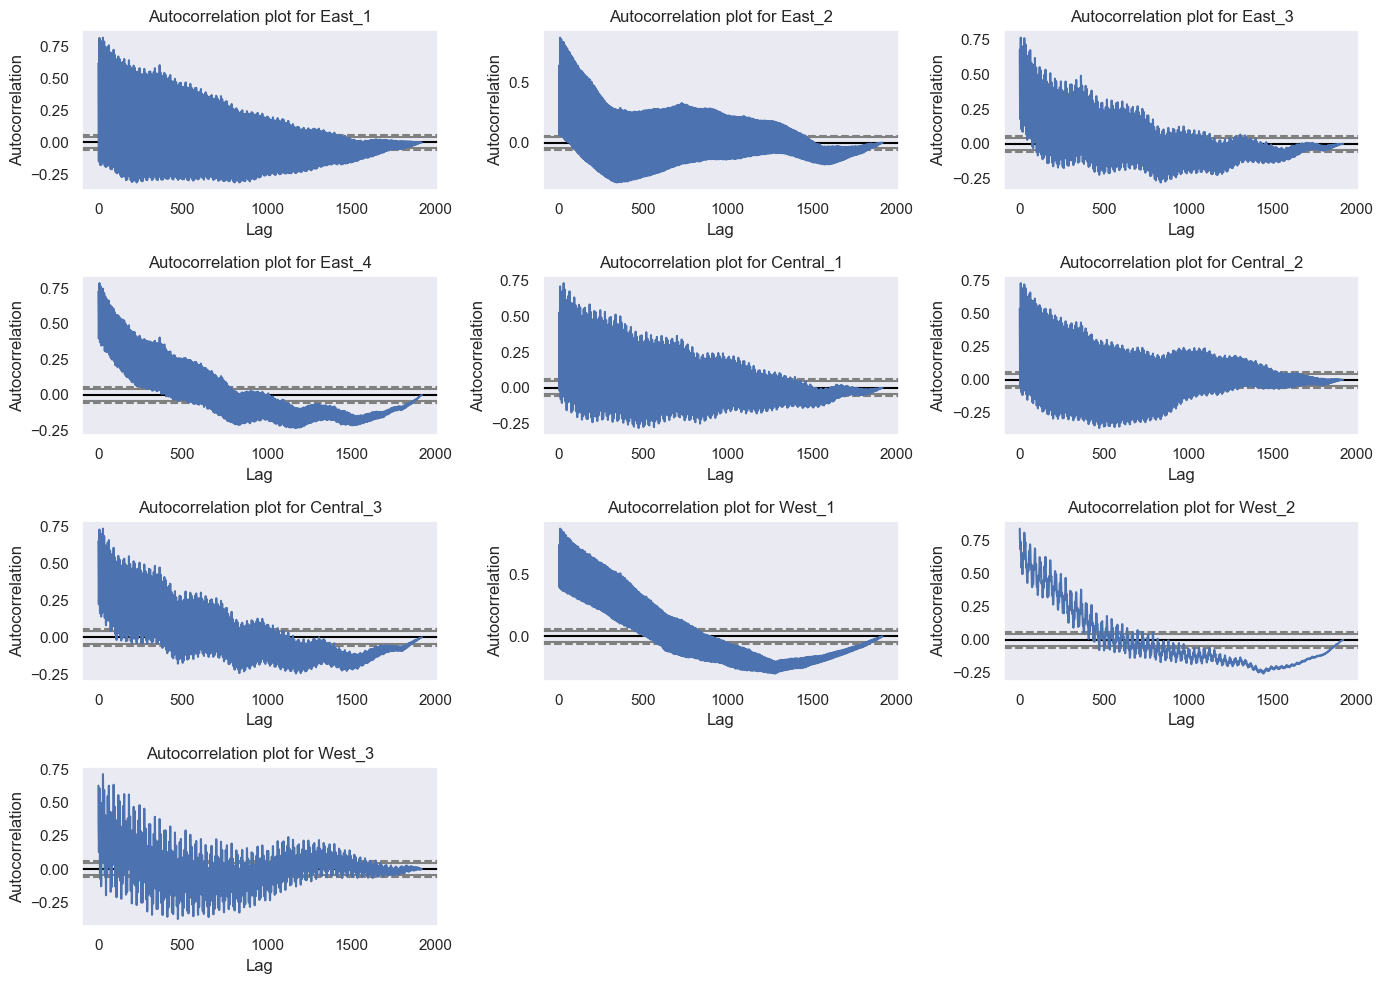

In [106]:
plot_autocorrelation(store_ls, df_store_temp, 4, 3, 14, 10)

In [37]:
# Items averaged over the regions
df_region_temp = df_train.groupby(["region_id"]).mean()
df_region_temp.reset_index(inplace=True)

df_region_temp = pd.DataFrame(
    data = {
    "d" : df_region_temp.columns[1:],
    "Central" : df_region_temp.iloc[0, 1:],
    "East" : df_region_temp.iloc[1, 1:],
    "West" : df_region_temp.iloc[2, 1:],
    }
)

df_region_temp["d"] = df_region_temp["d"].astype("string")

df_region_temp = pd.merge(df_region_temp, df_cal, on = "d", how = "left")
df_region_temp = df_region_temp.set_index("date")

<AxesSubplot:xlabel='date'>

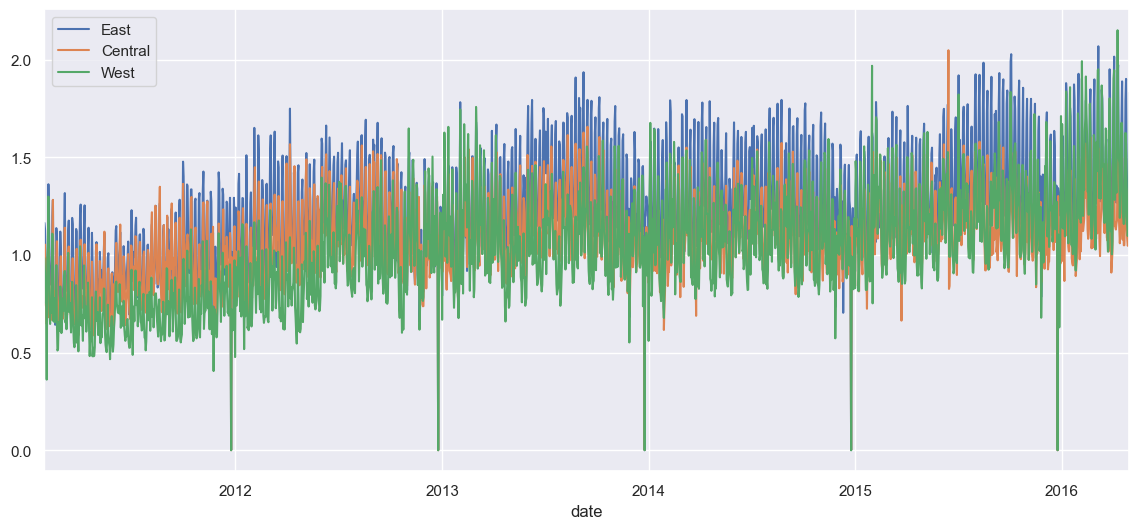

In [68]:
sns.set(rc={'figure.figsize':(14, 6)})

df_region_temp[region_ls].plot()

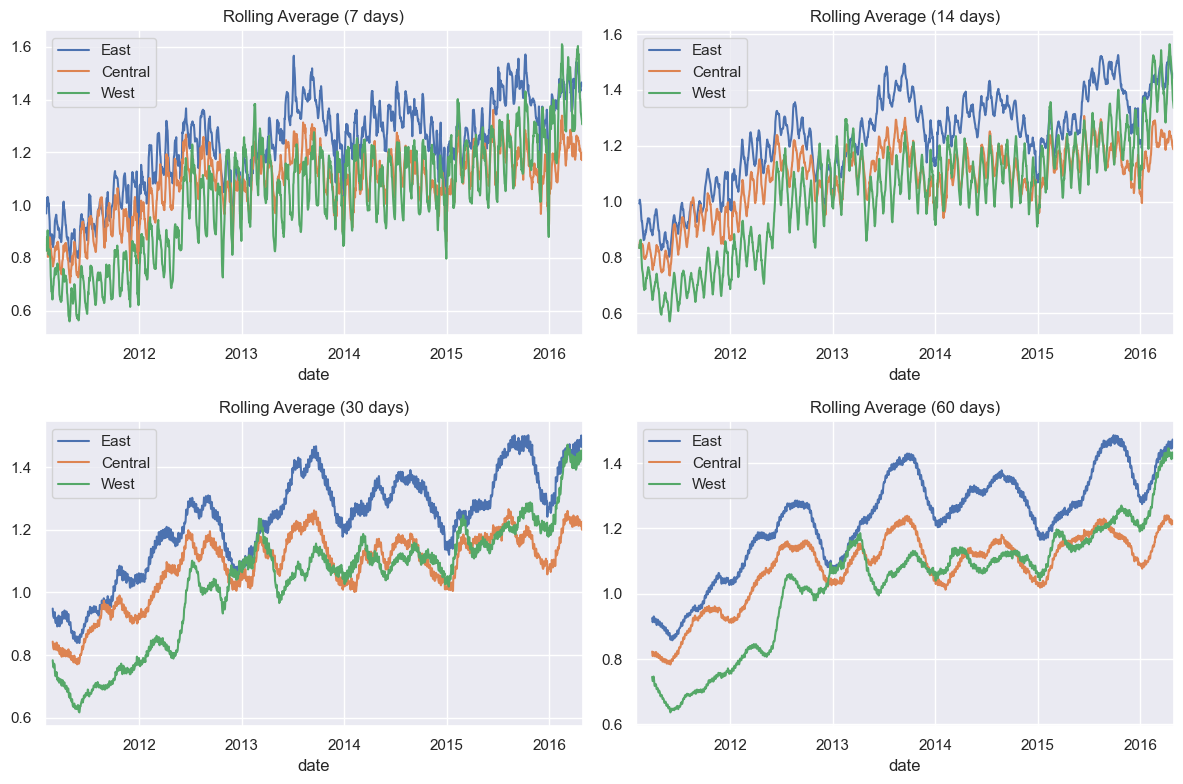

In [69]:
plot_rolling_average(df_region_temp[region_ls])

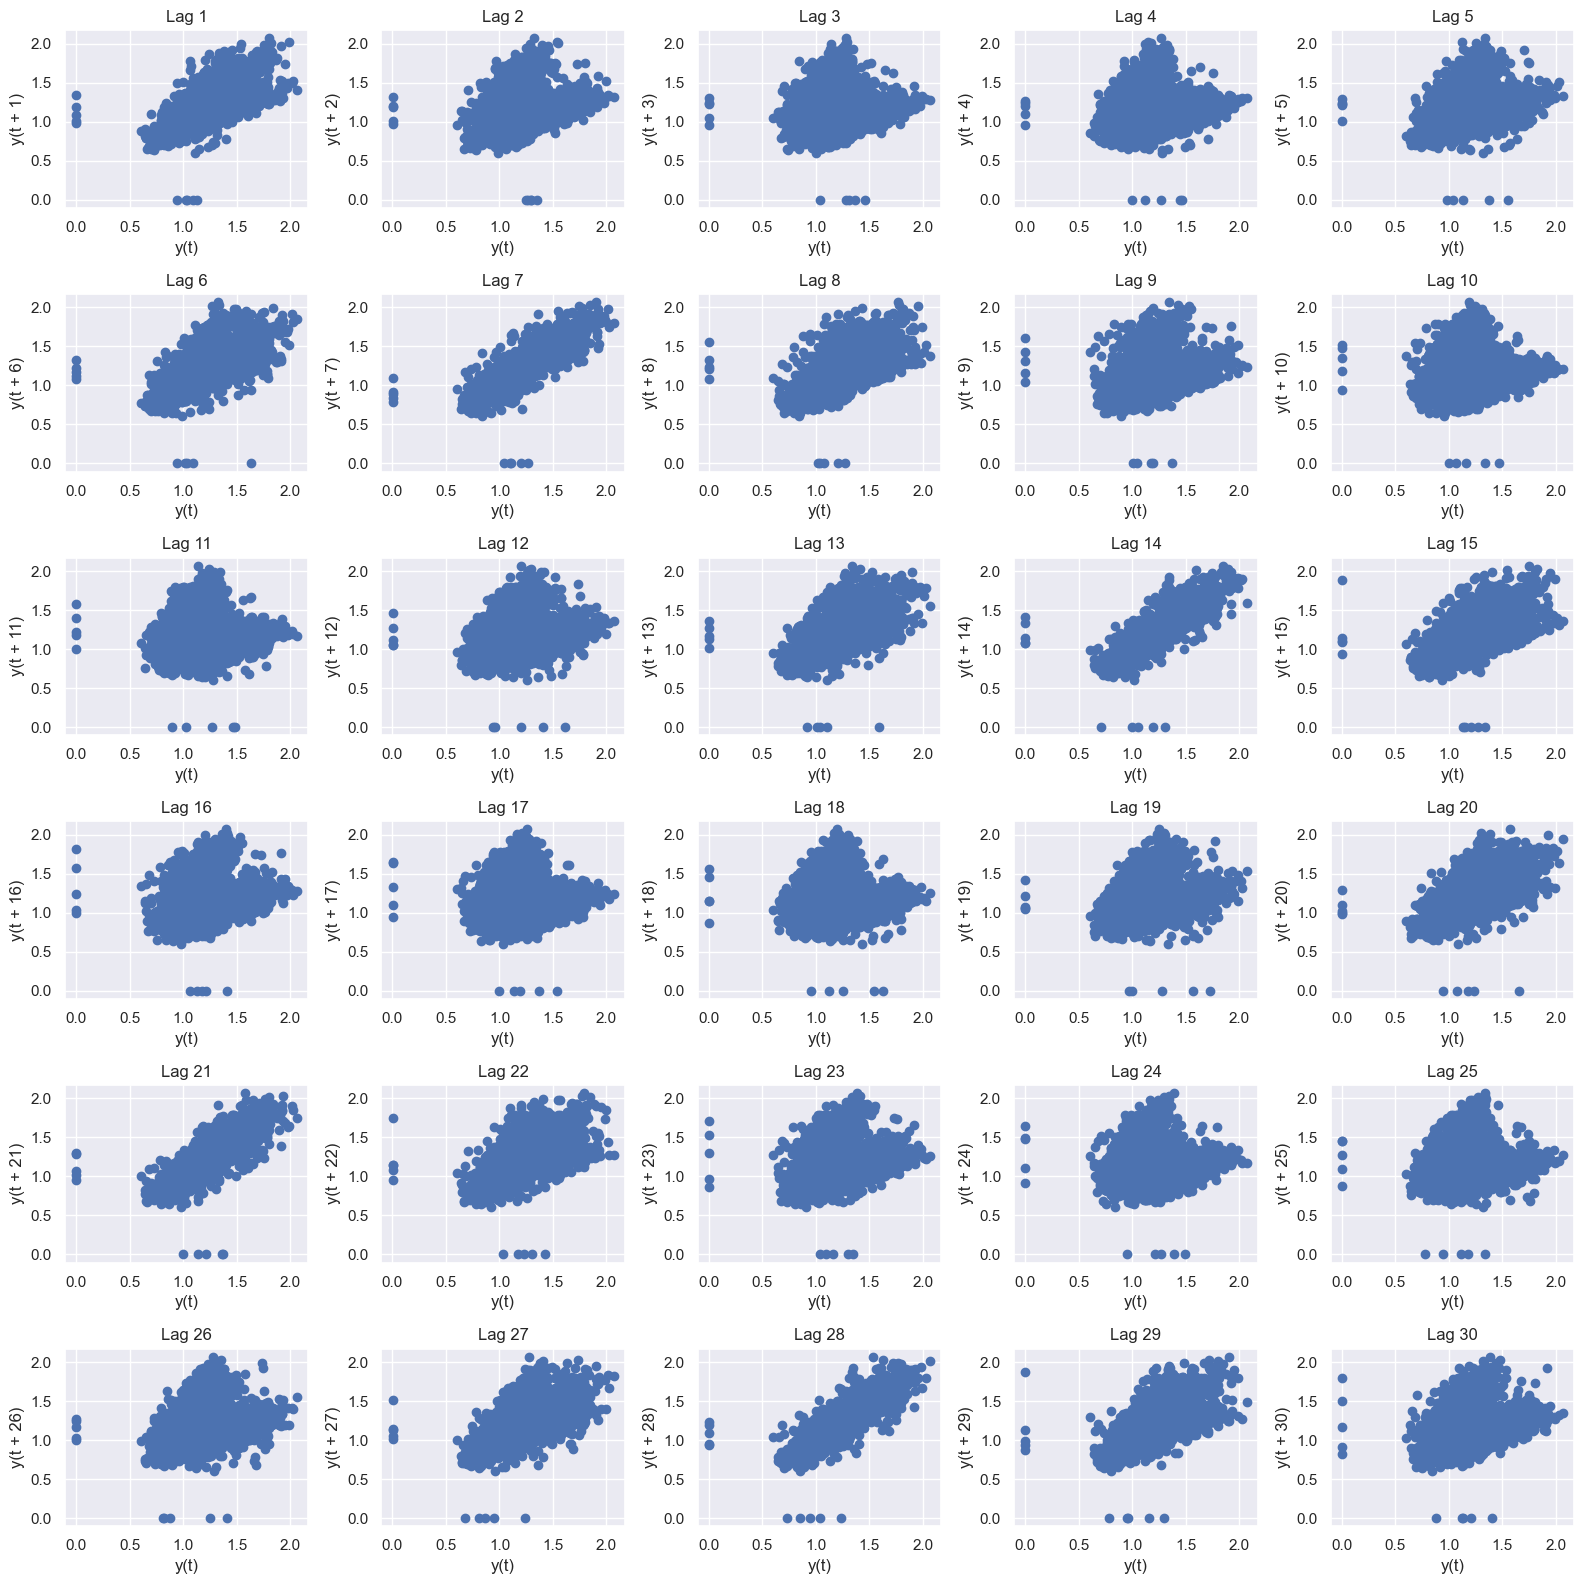

In [70]:
plot_lags(df_region_temp["East"])

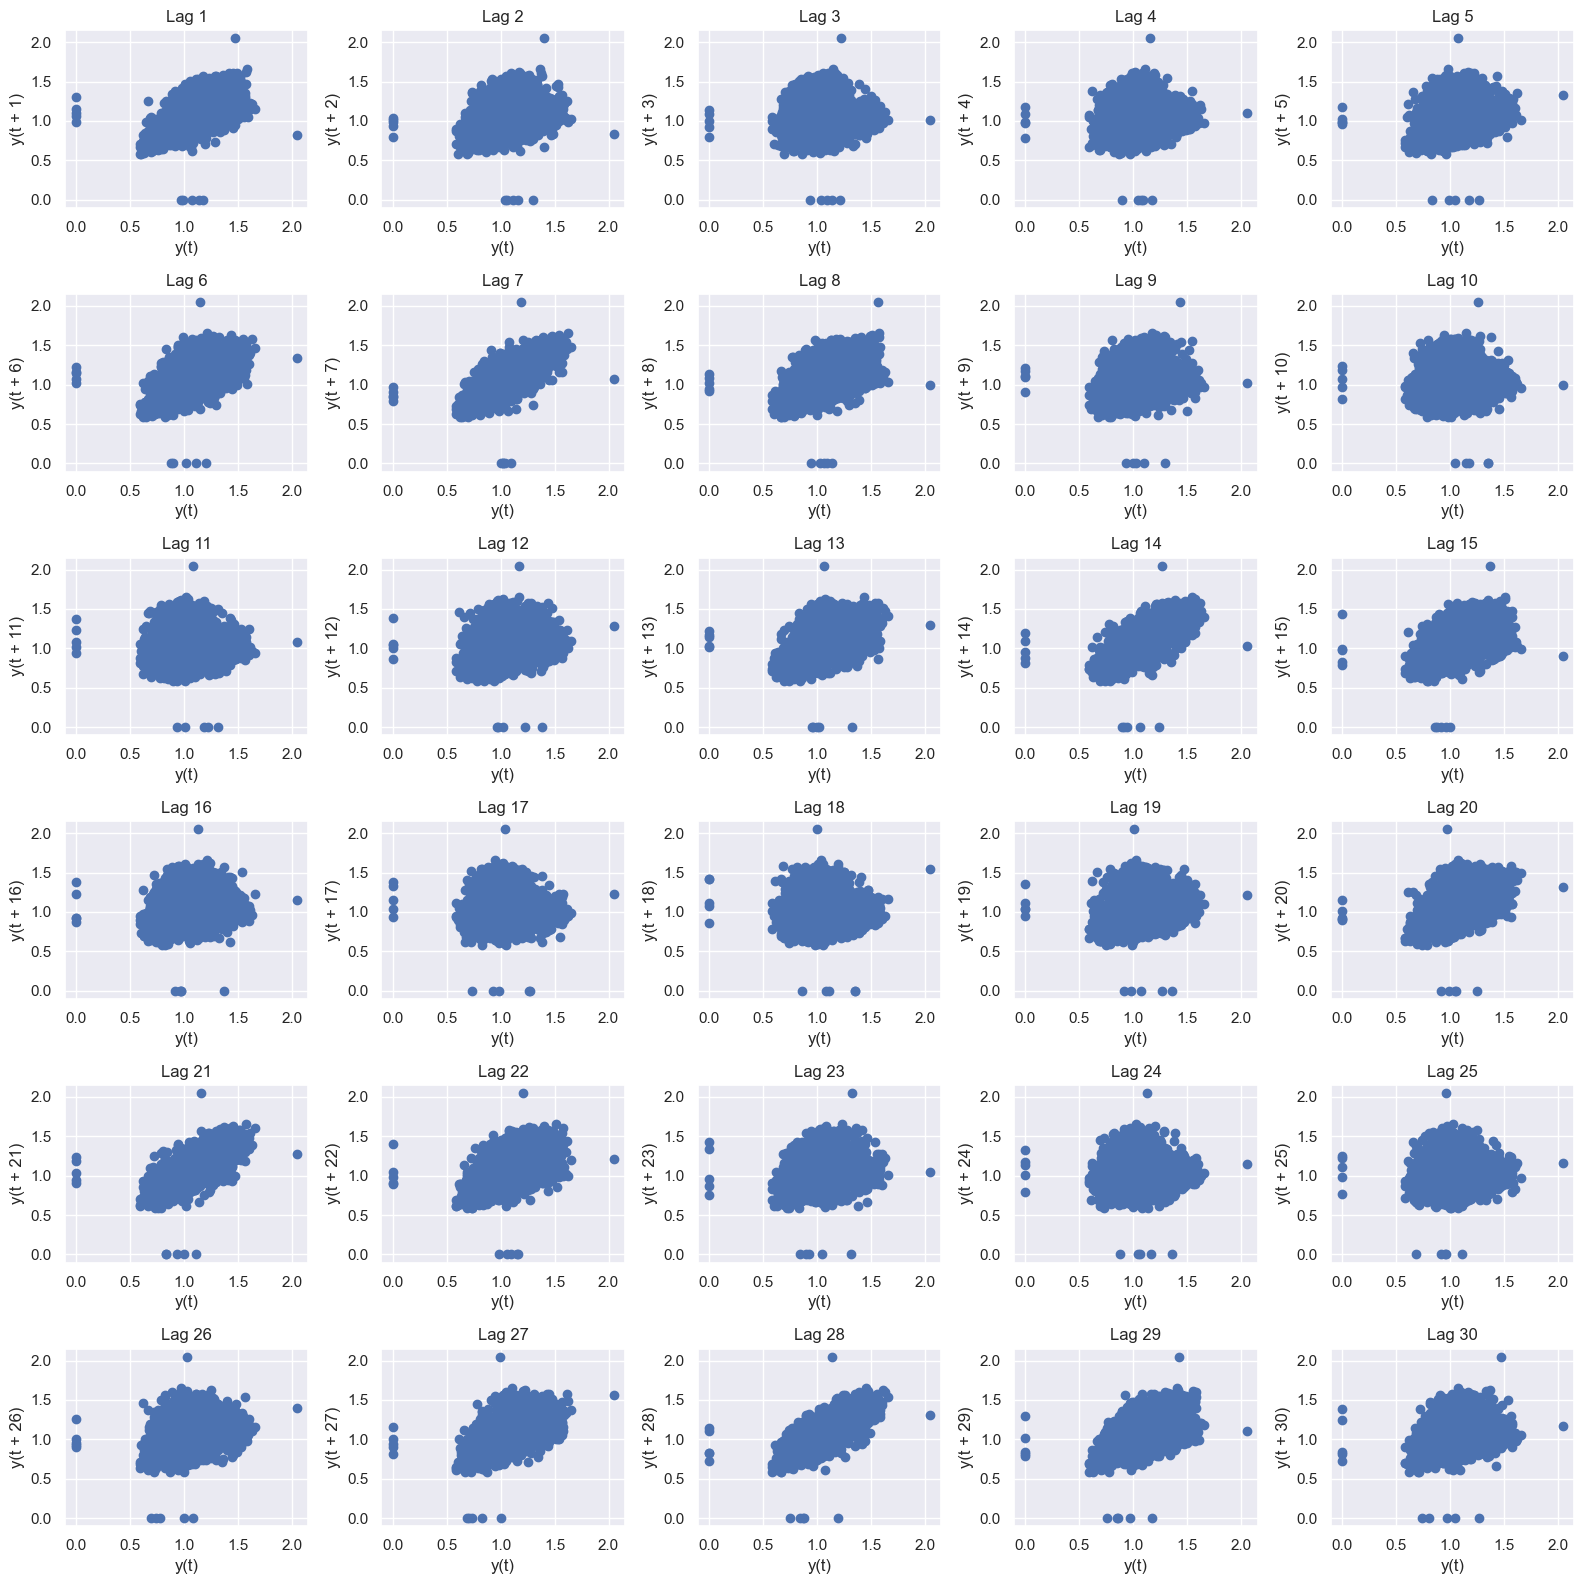

In [71]:
plot_lags(df_region_temp["Central"])

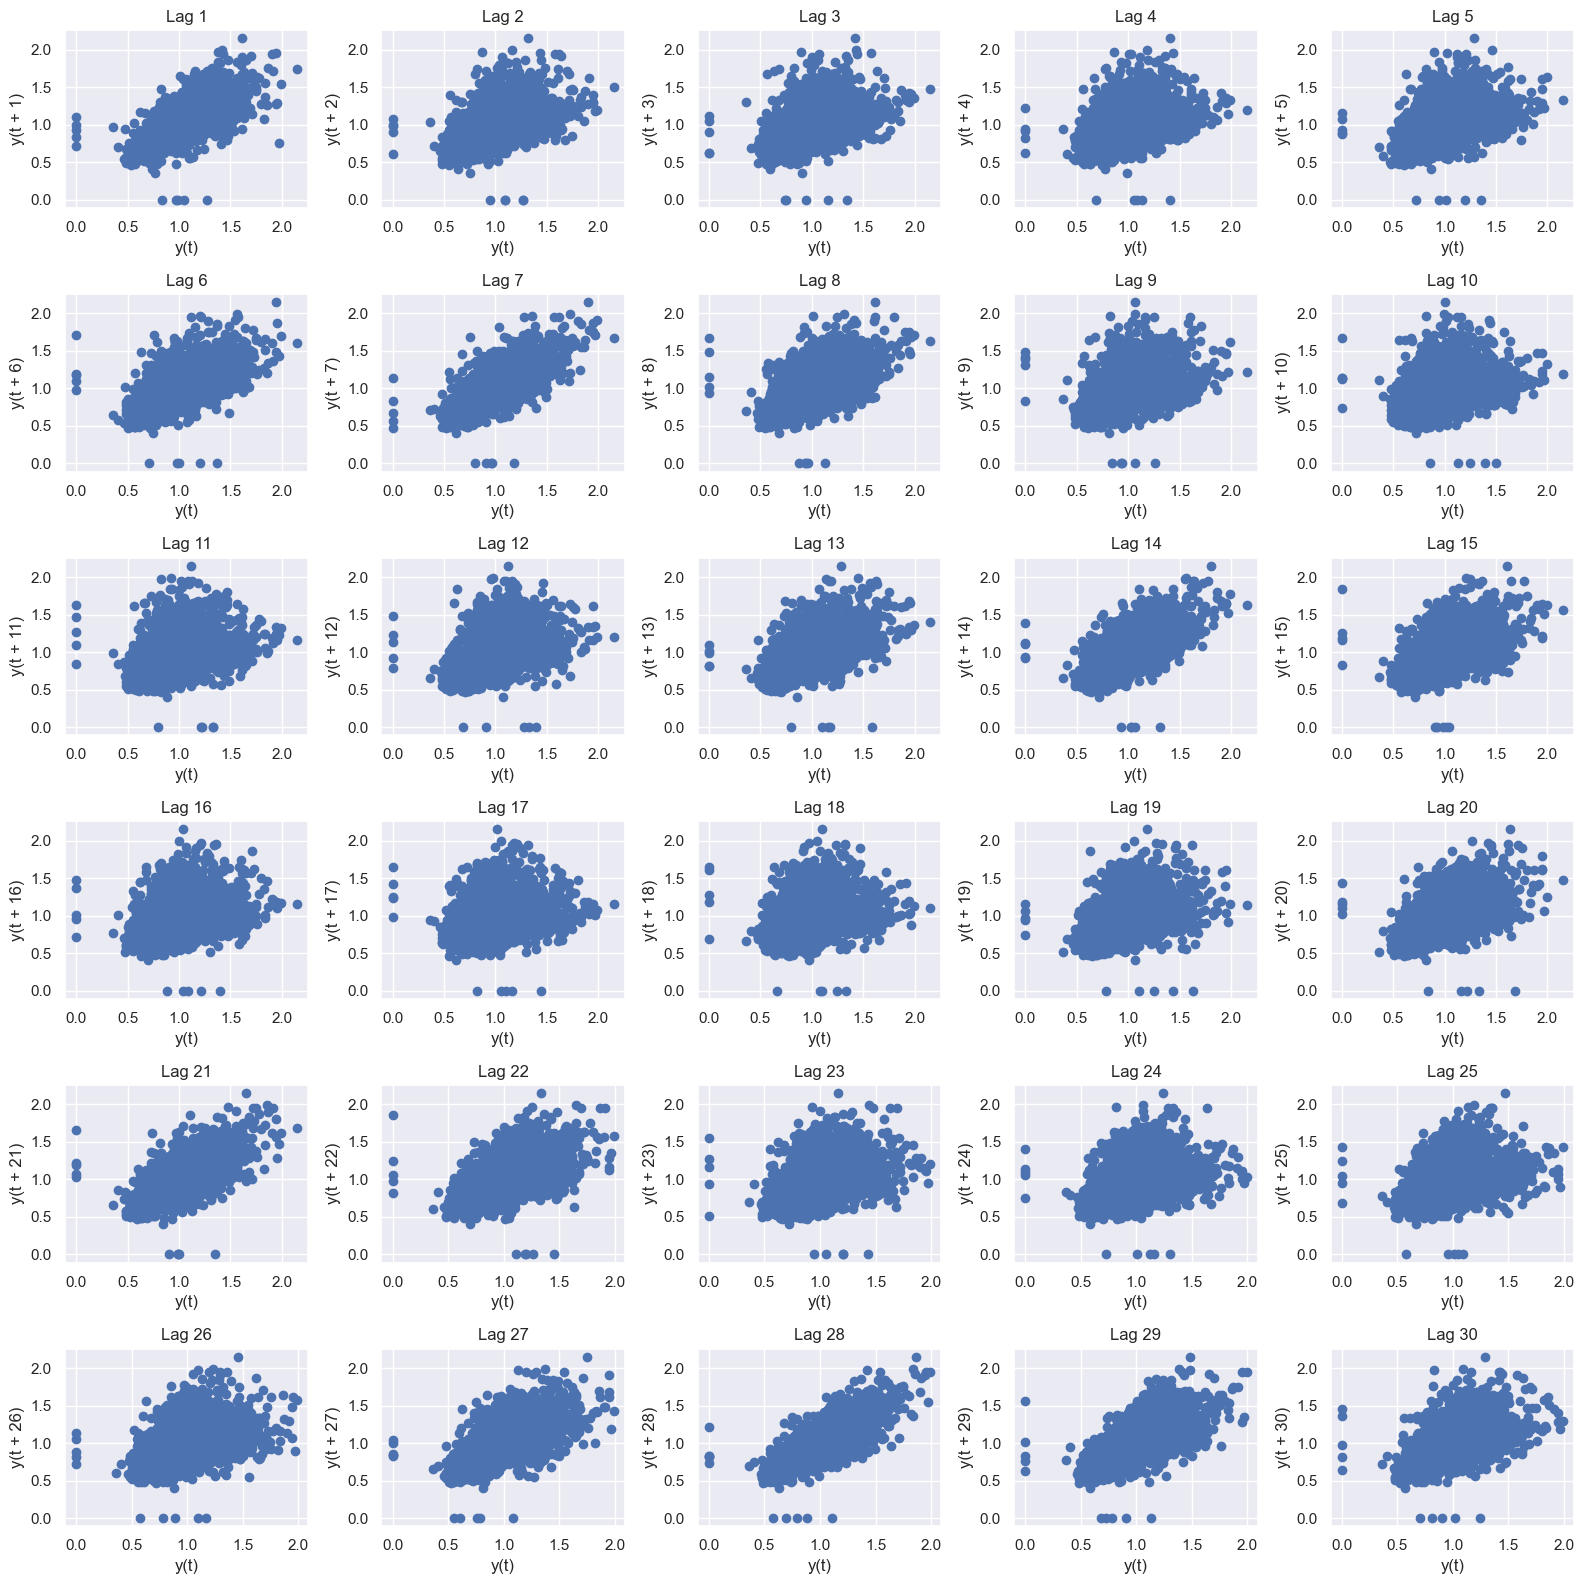

In [72]:
plot_lags(df_region_temp["West"])

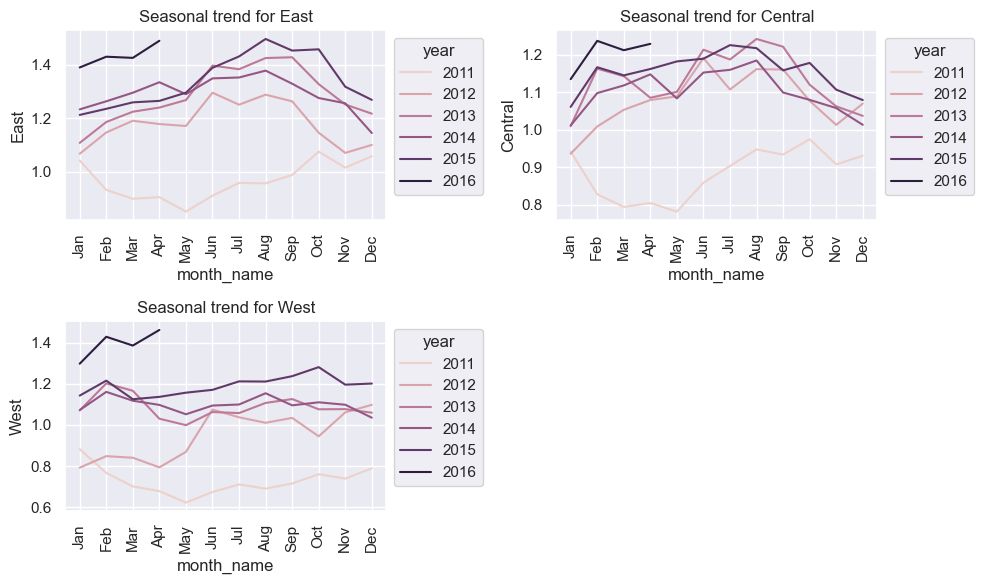

In [80]:
plot_seasonal("month_name", region_ls, "year", df_region_temp, 2, 2, 10, 6)

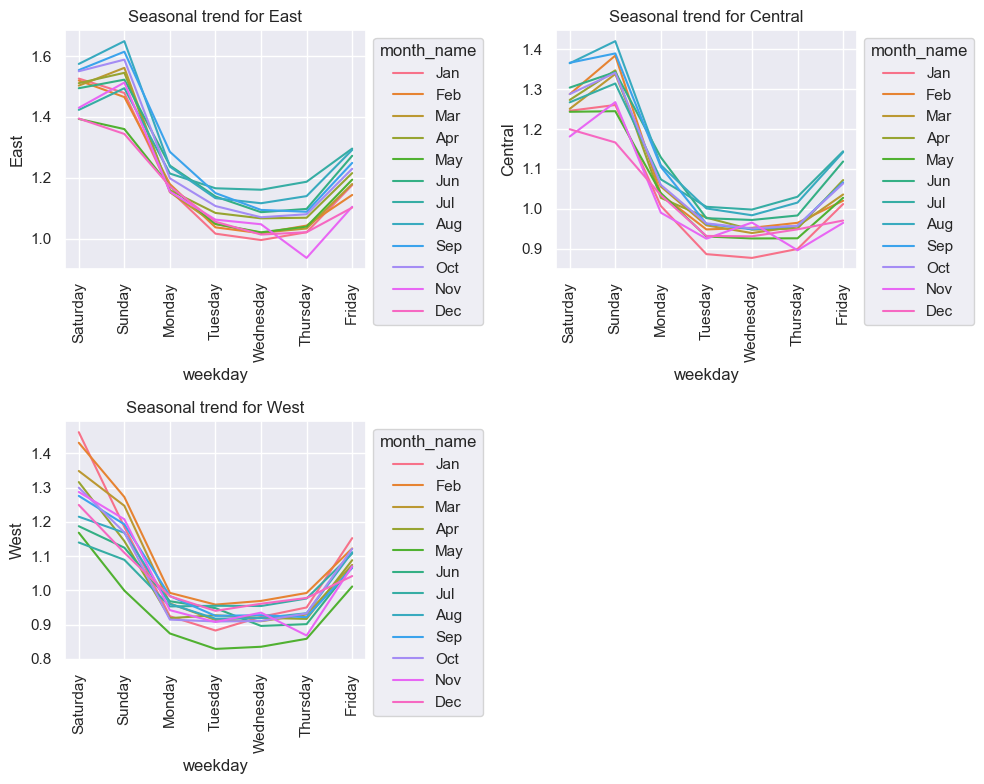

In [82]:
plot_seasonal("weekday", region_ls, "month_name", df_region_temp, 2, 2, 10, 8)

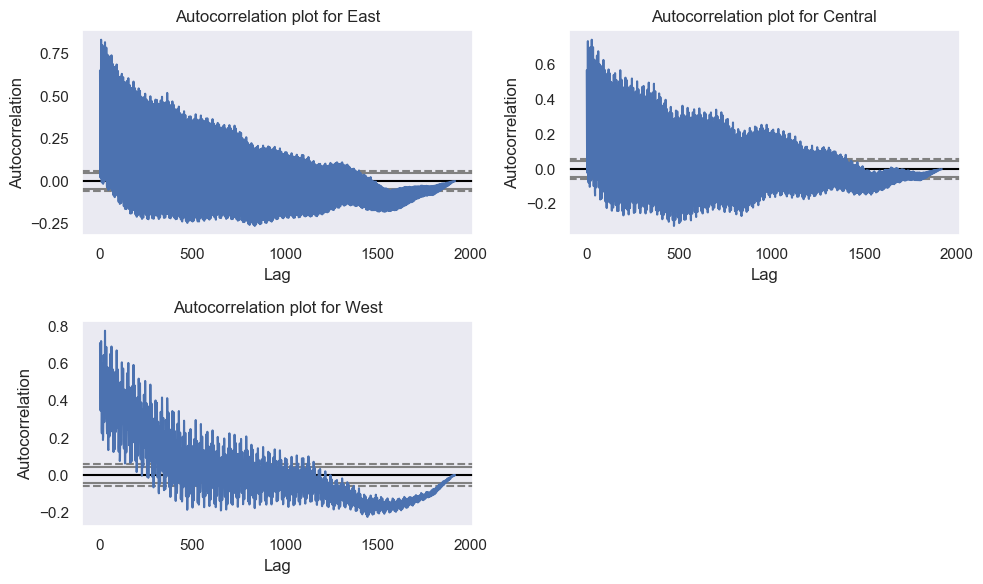

In [105]:
plot_autocorrelation(region_ls, df_region_temp, 2, 2, 10, 6)